In [5]:
import pandas as pd

# 读取CSV文件
file_path = "Mn_prediction.csv"  
df = pd.read_csv(file_path)


# 查看前5行数据
print("前5行数据：")
print(df.head())

# 查看数据的基本信息
print("\n数据概况：")
print(df.info())

# 查看数值列的统计信息
print("\n数值列统计描述：")
print(df.describe())


前5行数据：
          a         b         c   α         β    γ          V  r(M)[Å]  χ(M)  \
0   9.45356   9.45356   6.83414  90   90.0000  120   528.9391     1.18  1.90   
1   7.19499  14.47870  22.62138  90   90.0000   90  2356.5607     1.10  2.19   
2   5.55310   8.65081  13.96031  90  111.9734   90   621.9199     1.10  2.19   
3  14.74085  14.74085  14.74085  90   90.0000   90  3203.0813     1.10  2.19   
4   5.33838   5.54706   8.81905  90  126.9910   90   208.5903     1.18  1.90   

   lav(M-O)[Å]  ...  l(B-O)[Å]  d(B...B)[Å]  d(A...B)[Å]  ∠M-O-B[deg.]  CN(B)  \
0      1.65082  ...    0.00000      4.04496      3.37819      104.1695      6   
1      1.58571  ...    1.45713      7.19499      6.28293      132.5262      4   
2      1.55348  ...    2.02783      5.48002      3.78983      160.0453      5   
3      1.50066  ...    2.12717      6.38298      3.19233      128.9348      6   
4      1.66100  ...    2.00021      5.60365      3.21513      128.7731      4   

   d(B...M)/d(A...M)     

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 标准化：数据转换为均值为0，标准差为1的分布
scaler = StandardScaler()

# 选择数值型列进行标准化
num_columns = ['a', 'b', 'c', 'α', 'β', 'γ', 'V', 'r(M)[Å]', 'χ(M)', 'lav(M-O)[Å]', 'd(M...M)[Å]', 'D', 'σ[deg.2]', 
 'r(A)[Å]', 'χ(A)', 'CN(A)', 'χ(A)/r(A)[Å-1]', 'CN(A)*χ(A)/r(A)', 'χw(A)=χ(A)/l(A-O)', 'CN(A)×χw(A)', 
 'lav(A-O)[Å]', 'd(M...A)[Å]', 'd(A...A)[Å]', '∠M-O-A[deg.]', 'r(B)', 'χ(B)', 'χ(B)/r(B)', 'χw(B)=χ/l', 
 'CN(B)*χw(B)', 'd(M...B)[Å]', 'l(B-O)[Å]', 'd(B...B)[Å]', 'd(A...B)[Å]', '∠M-O-B[deg.]', 'CN(B)', 
 'd(B...M)/d(A...M)', 'rB/A', 'CN(B)*χ(B)/r(B)/d(M...A)', 'CN(B)*χw(B)/d(M...A)', 'λ(ZPL)'
]

df[num_columns] = scaler.fit_transform(df[num_columns])




ValueError: num must be an integer with 1 <= num <= 9, not 10

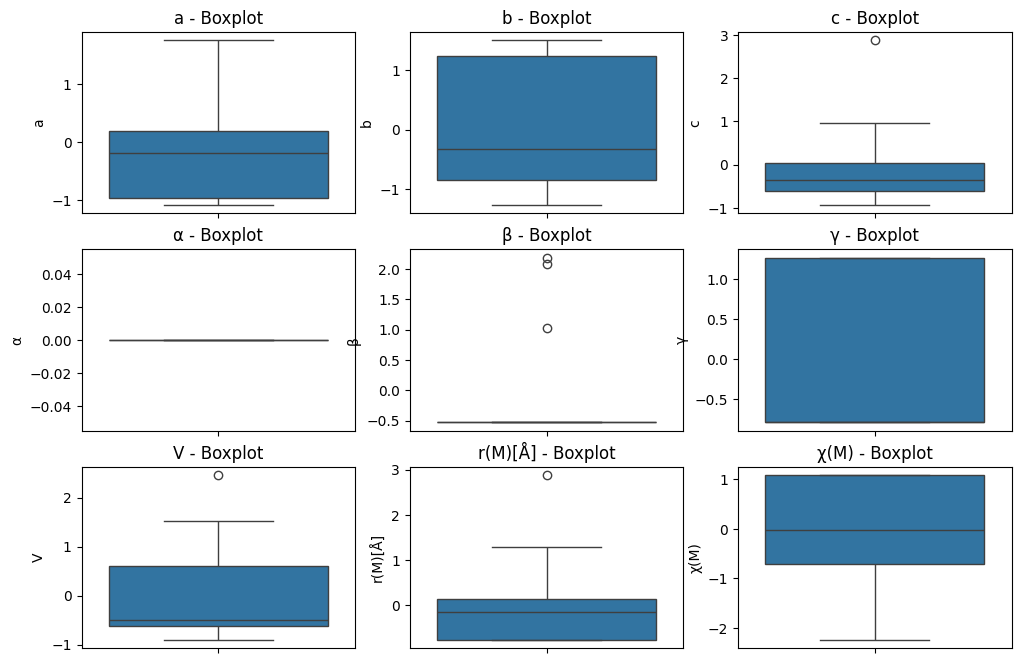

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用箱线图检查每一列的异常值
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])
    plt.title(f'{col} - Boxplot')
plt.tight_layout()
plt.show()


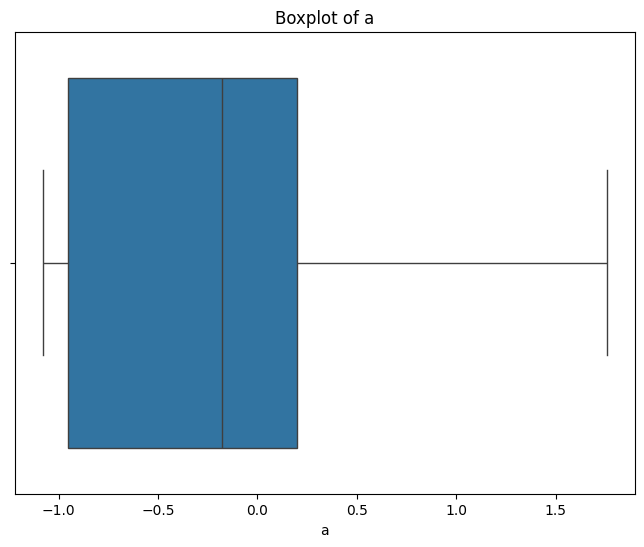

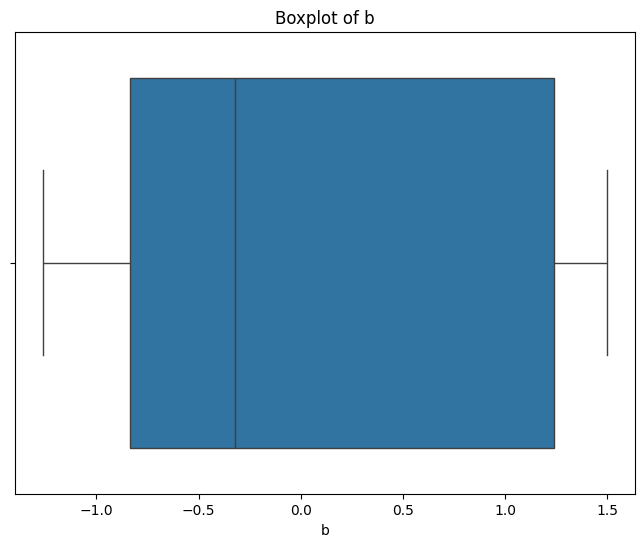

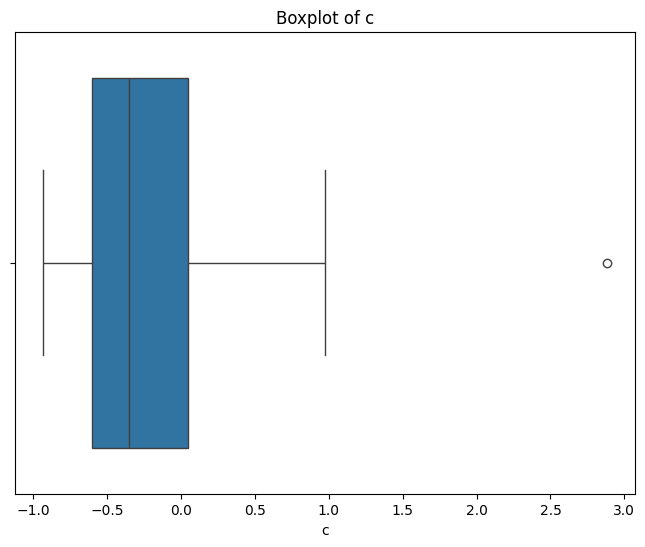

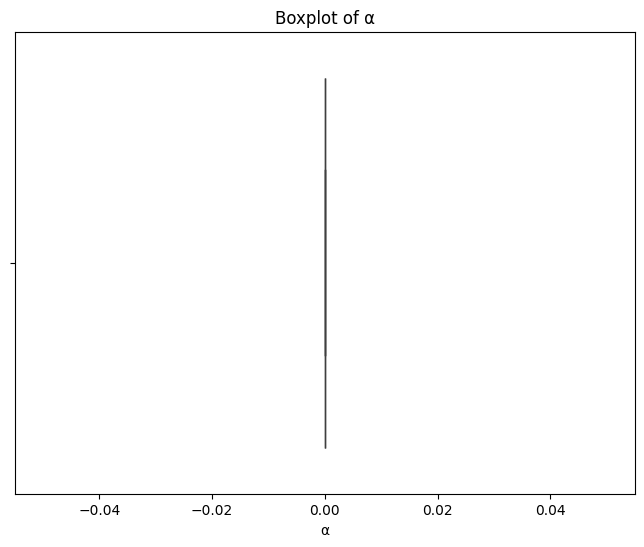

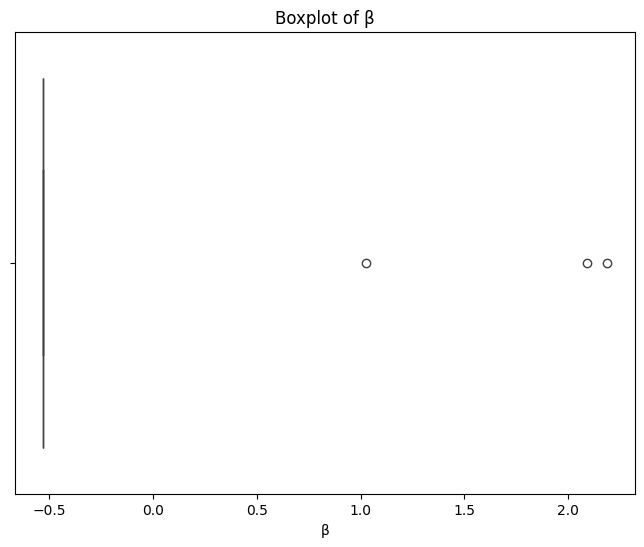

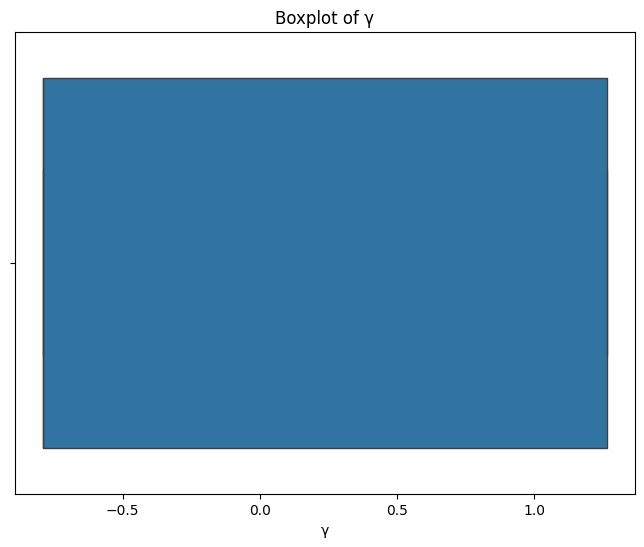

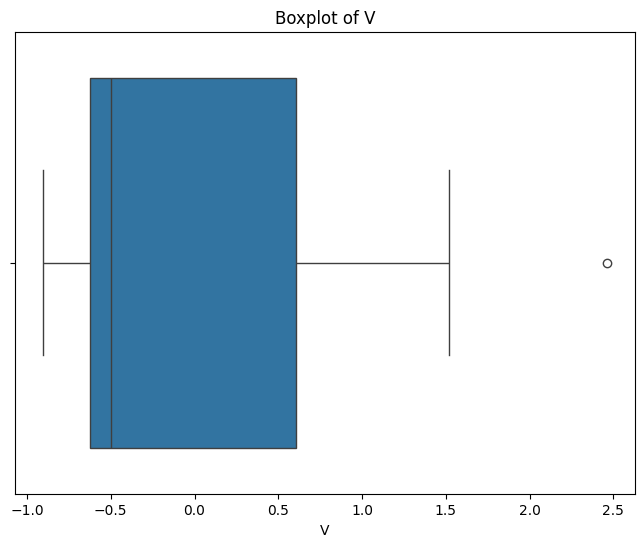

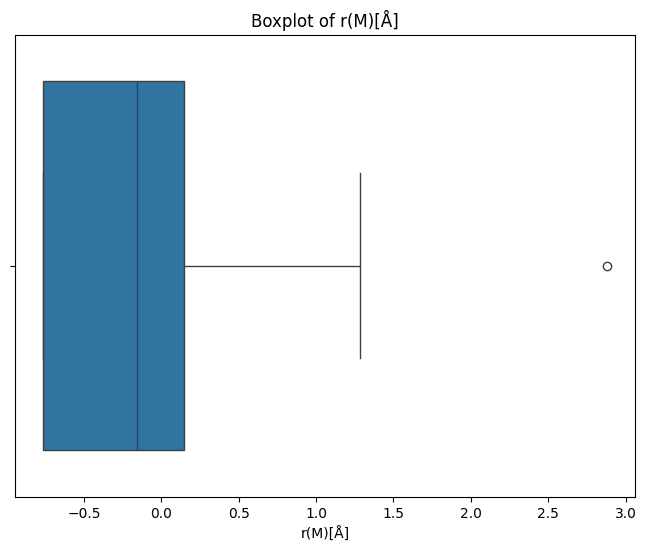

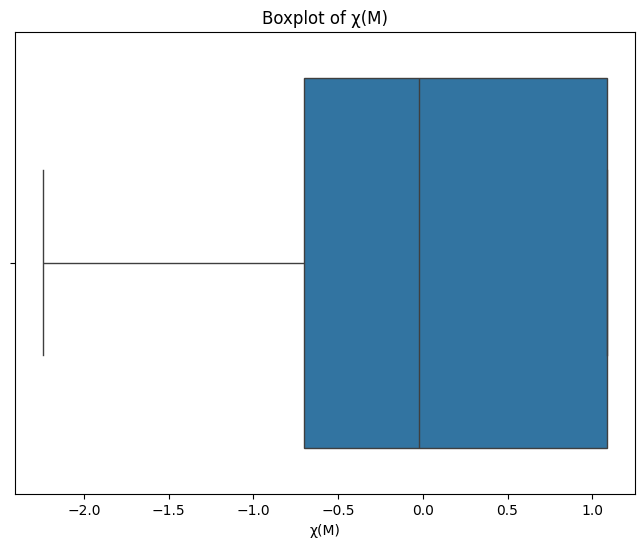

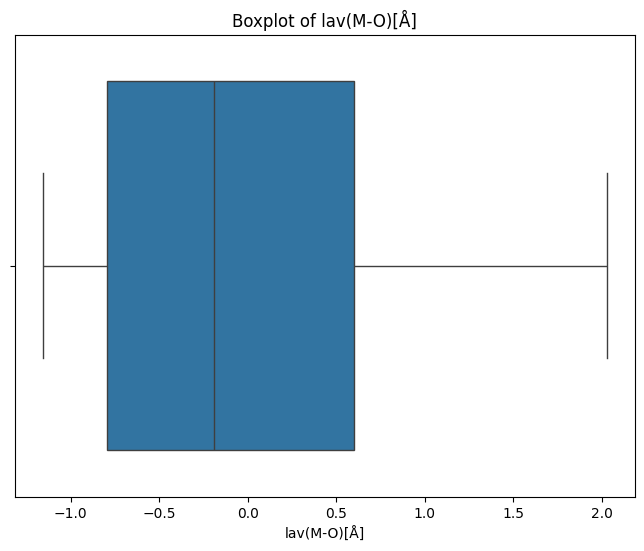

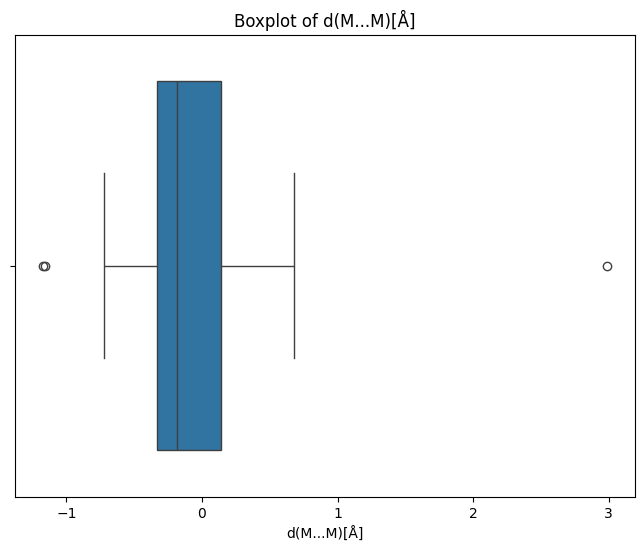

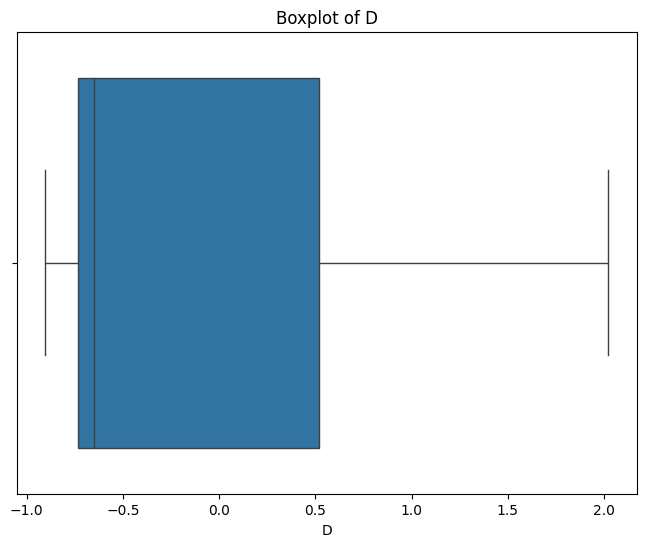

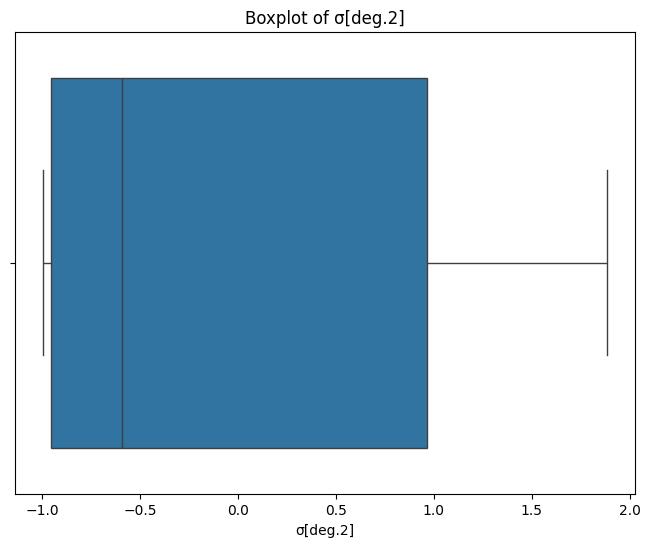

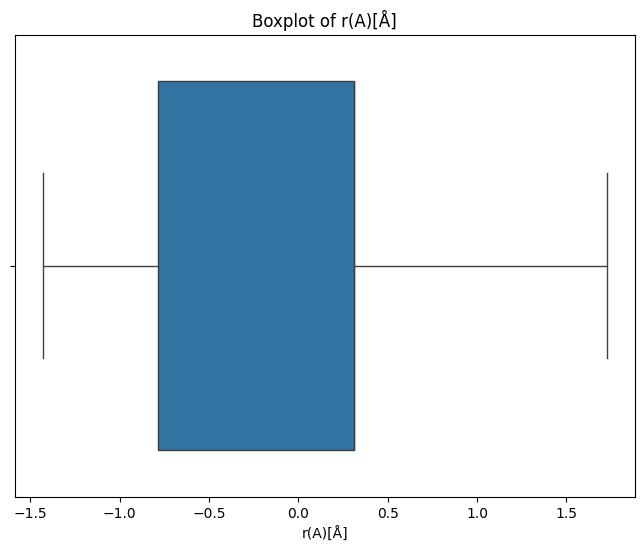

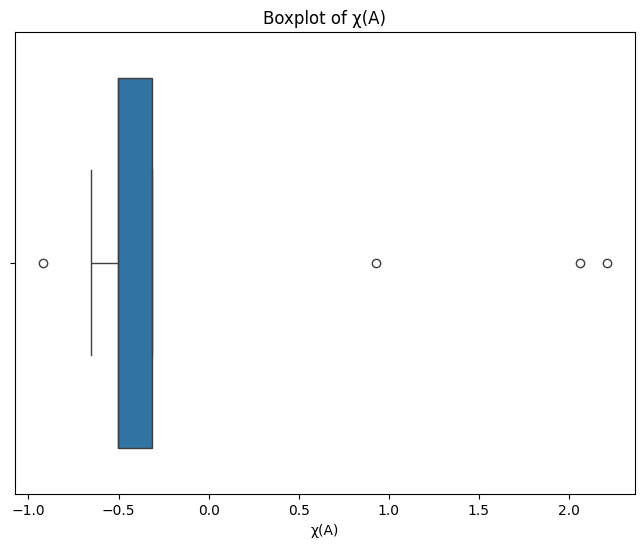

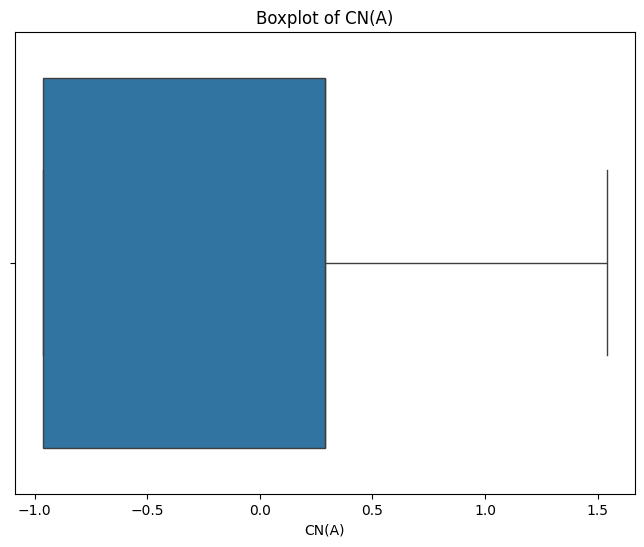

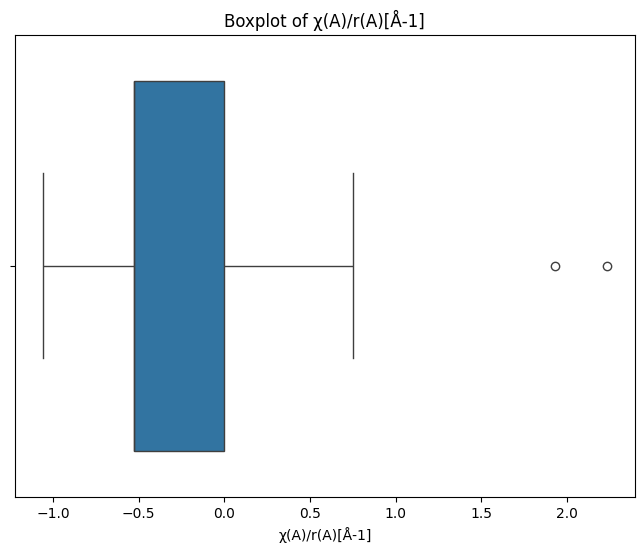

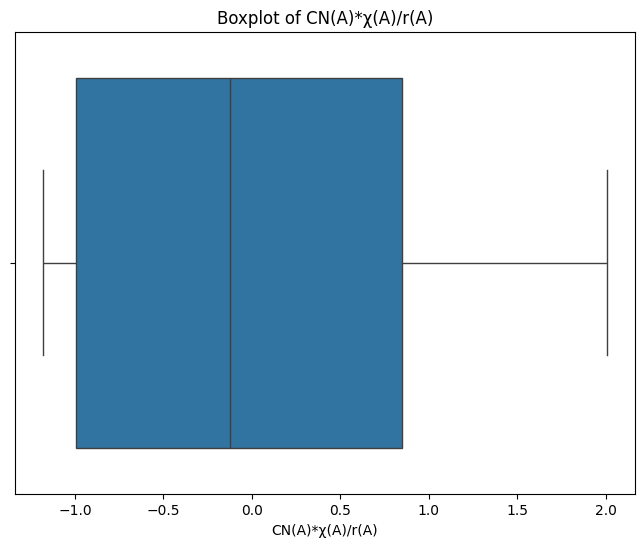

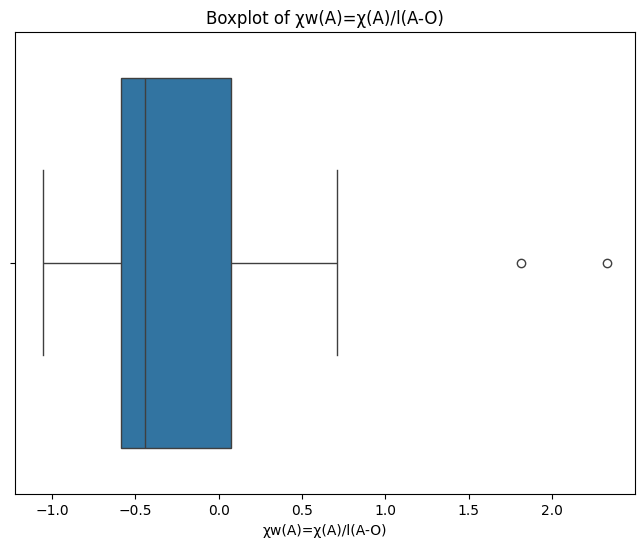

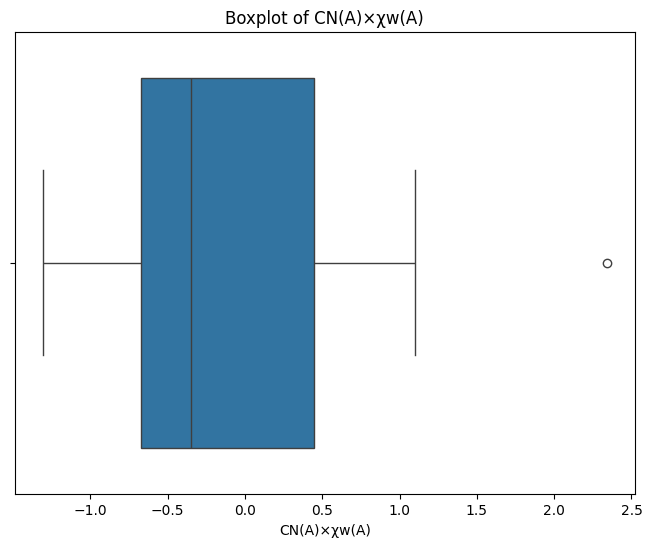

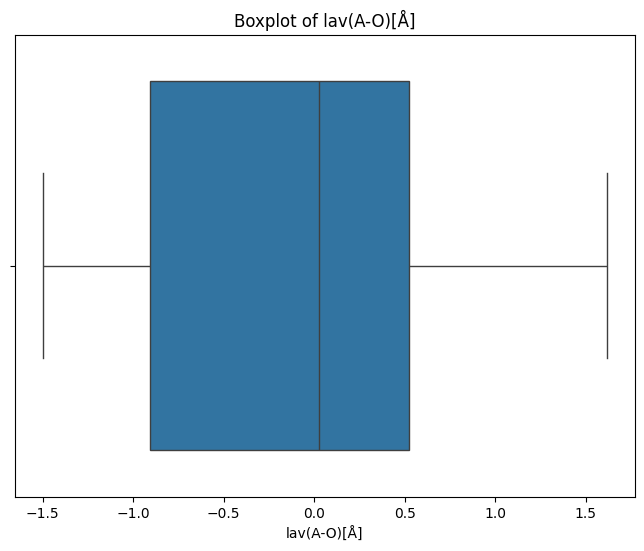

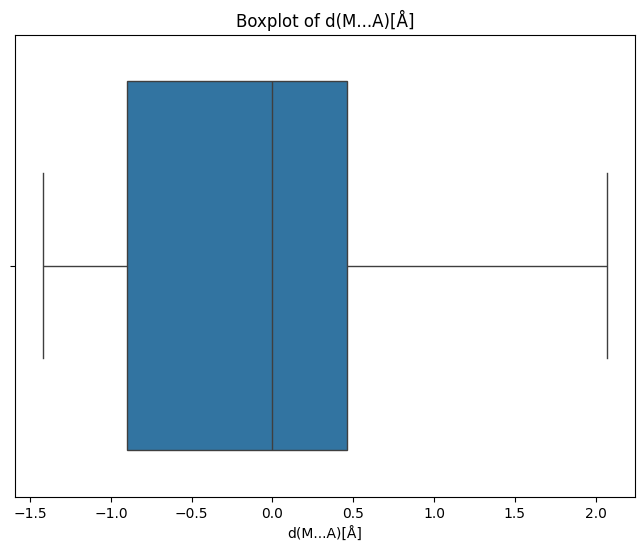

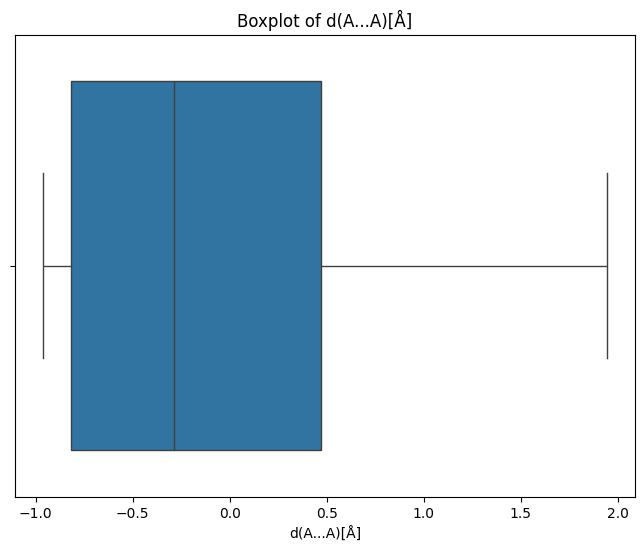

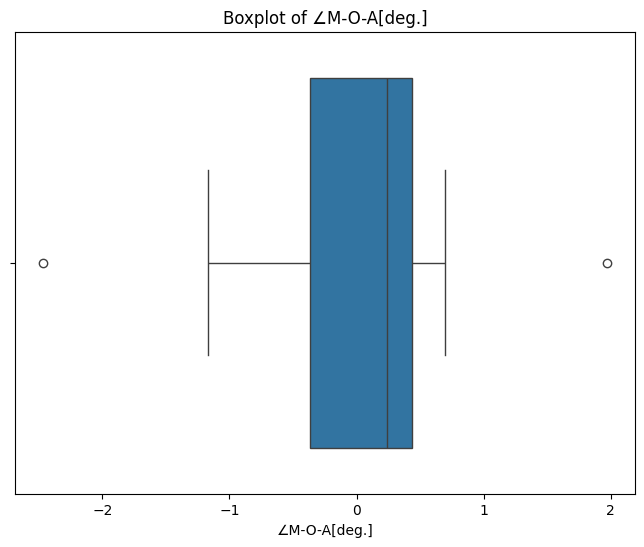

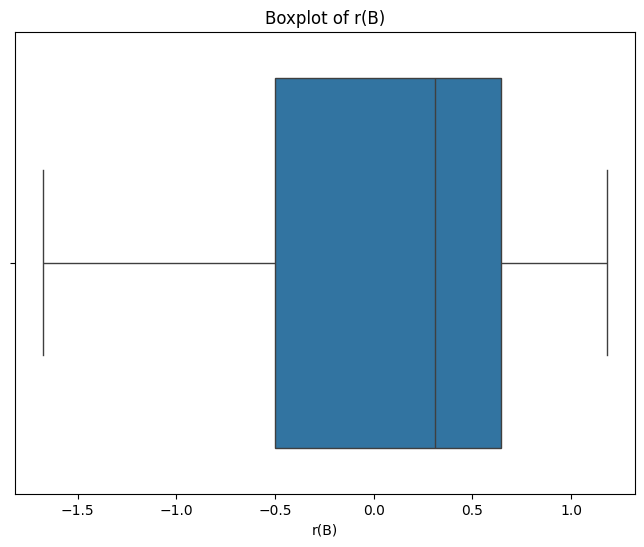

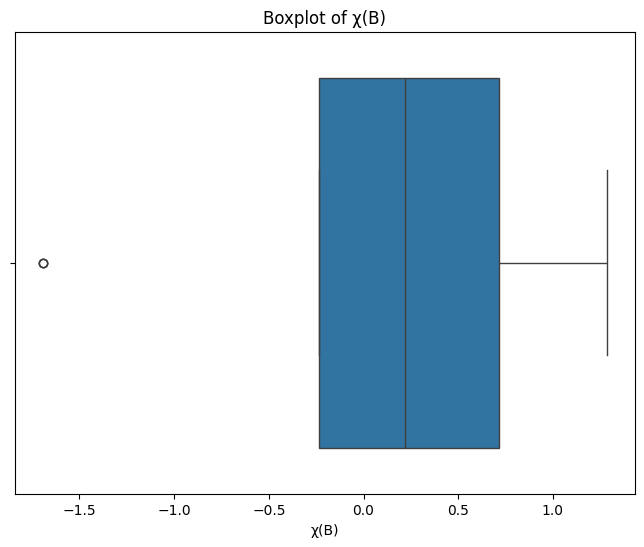

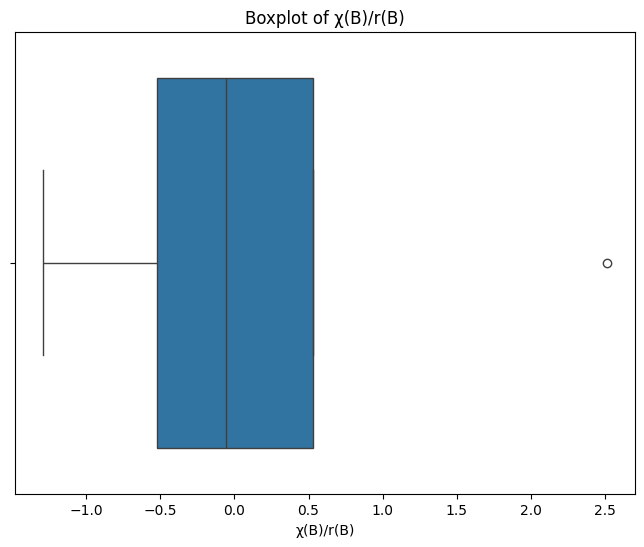

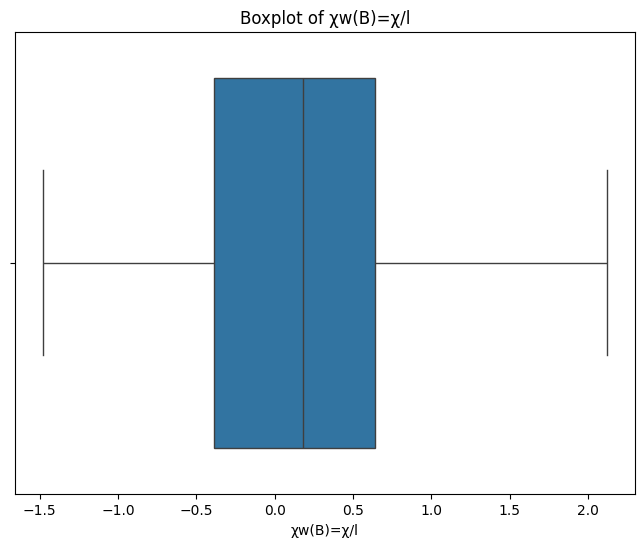

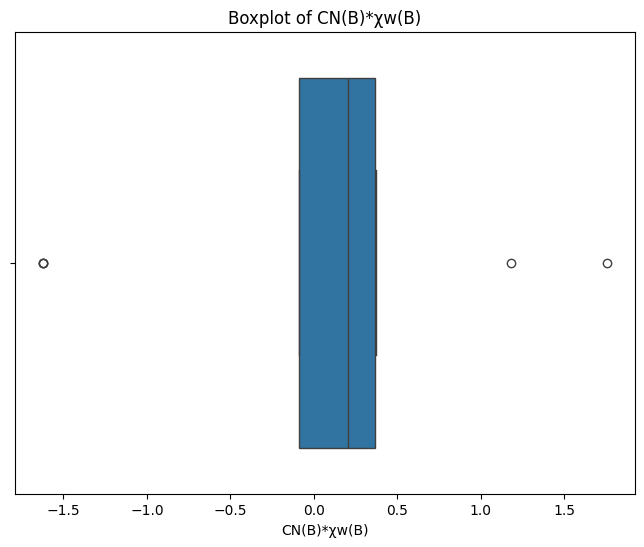

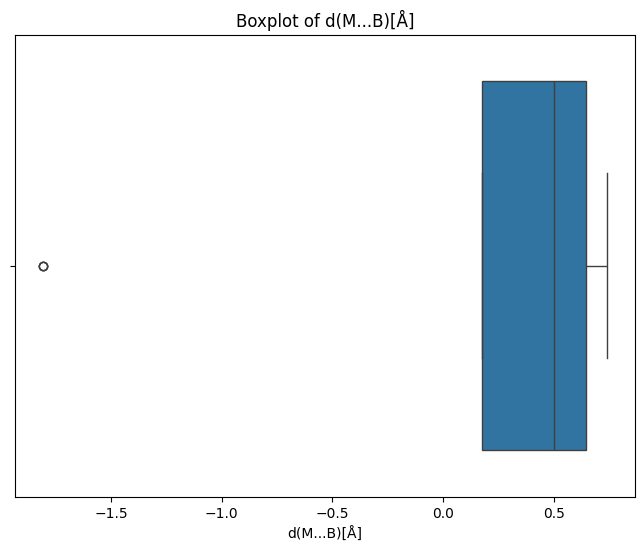

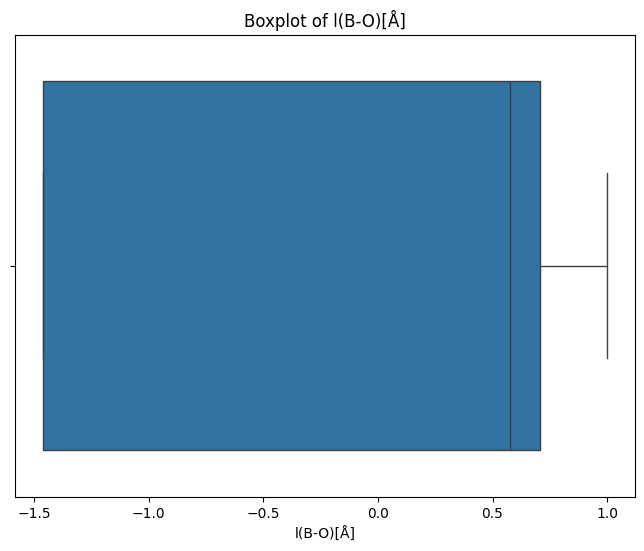

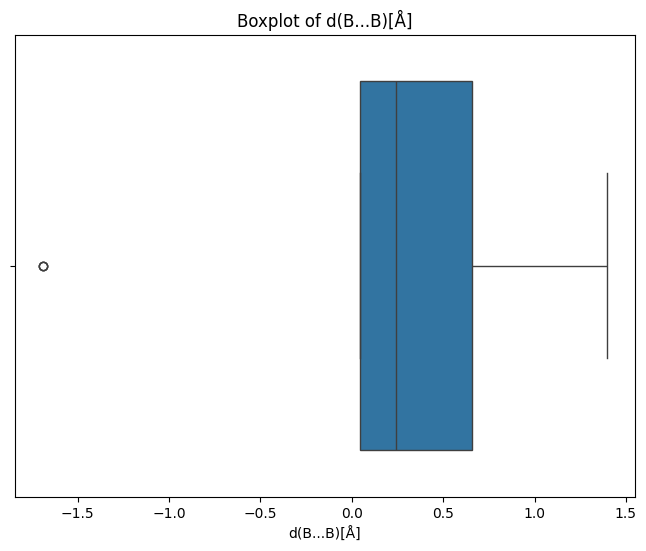

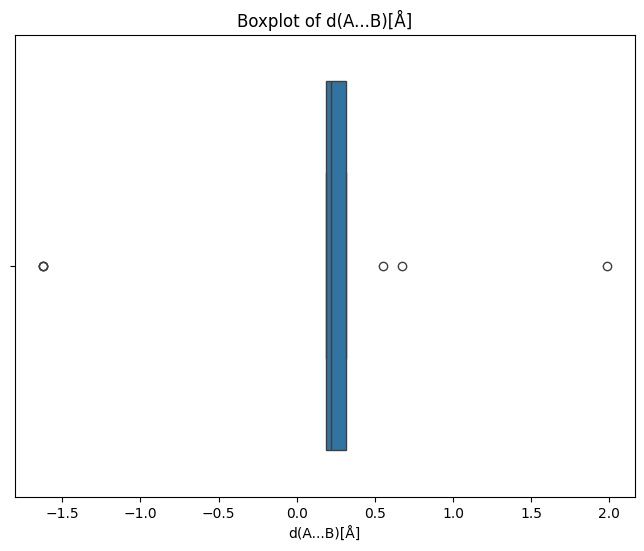

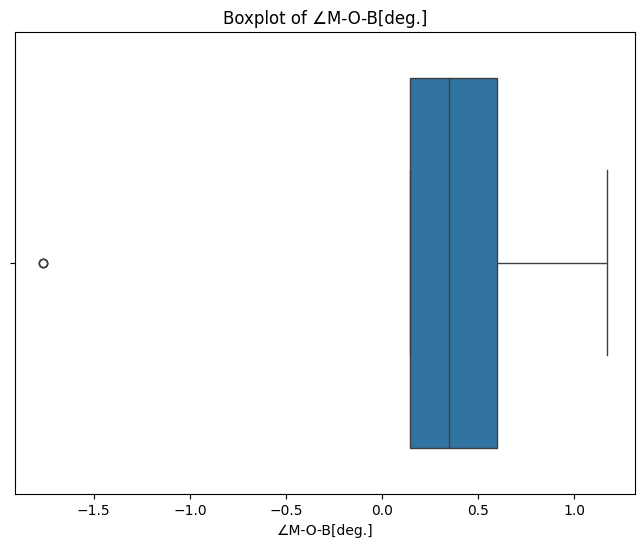

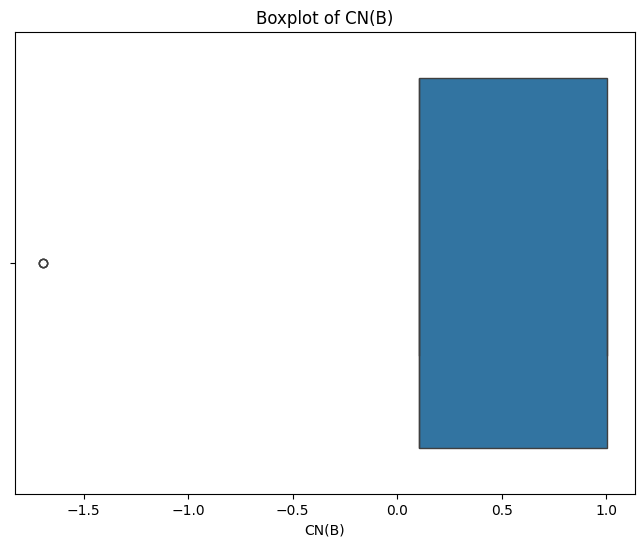

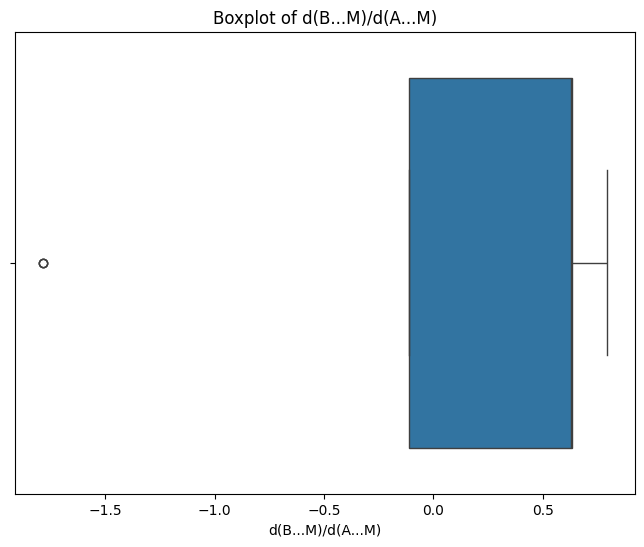

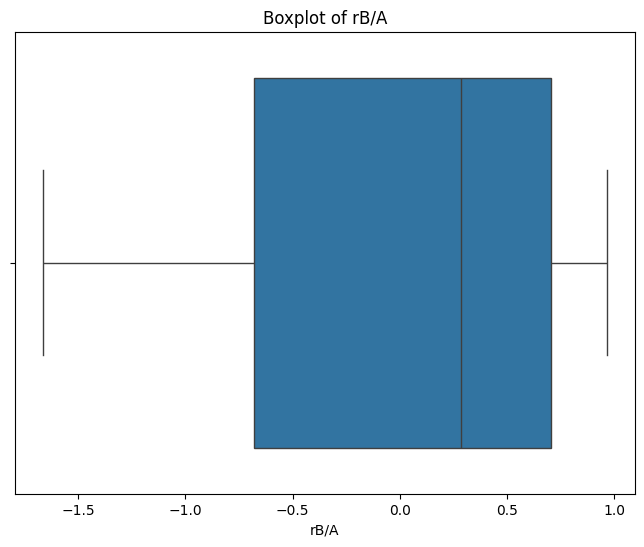

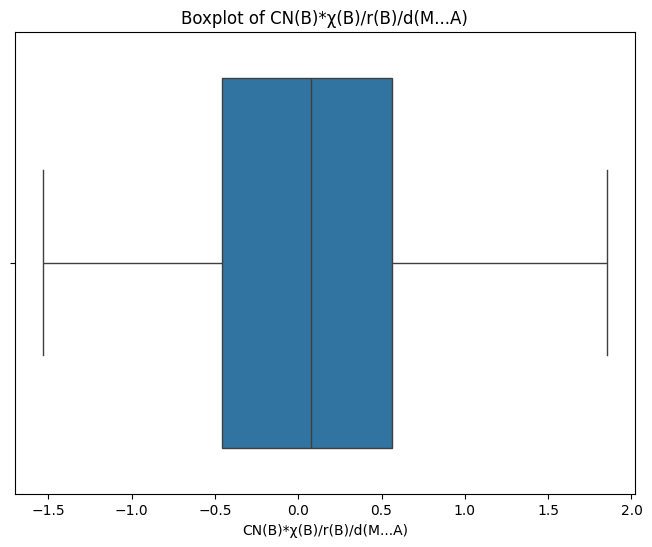

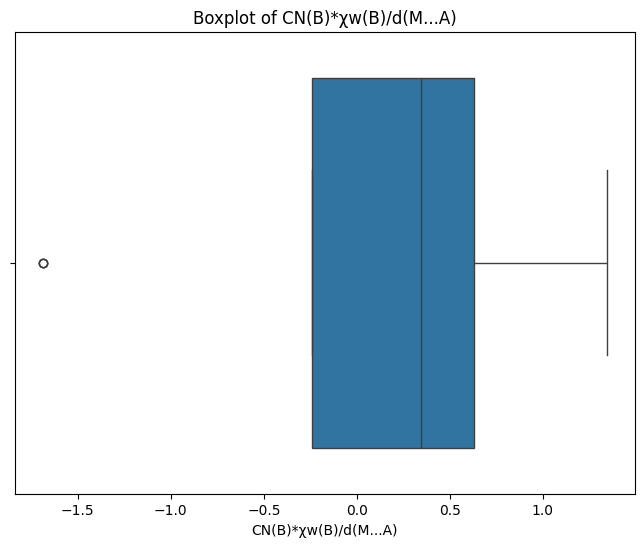

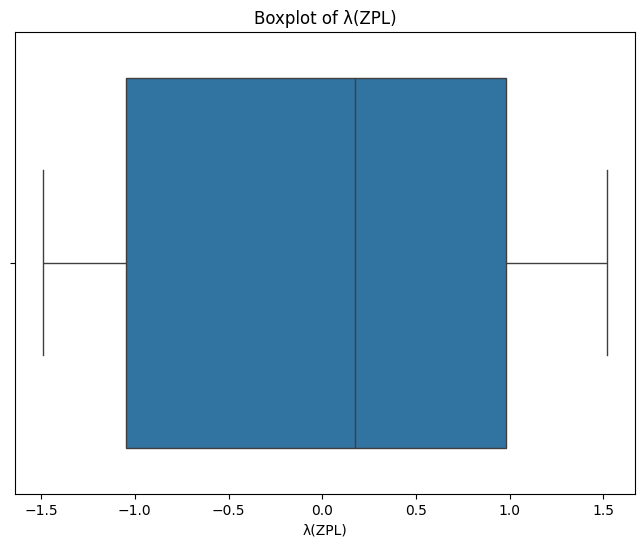

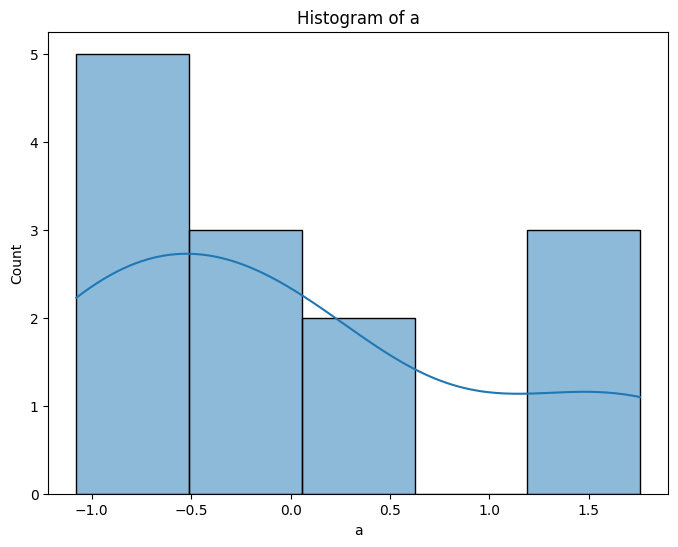

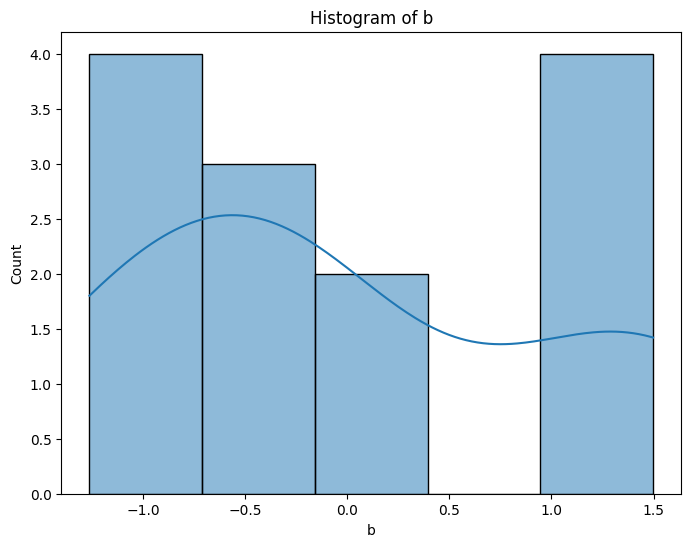

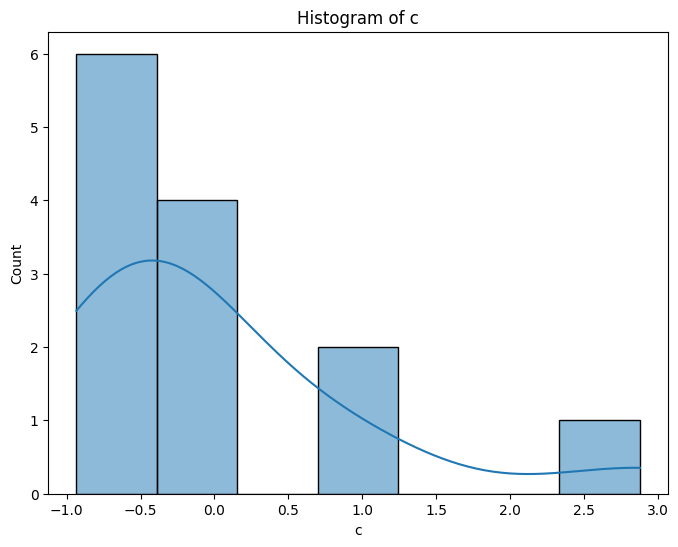

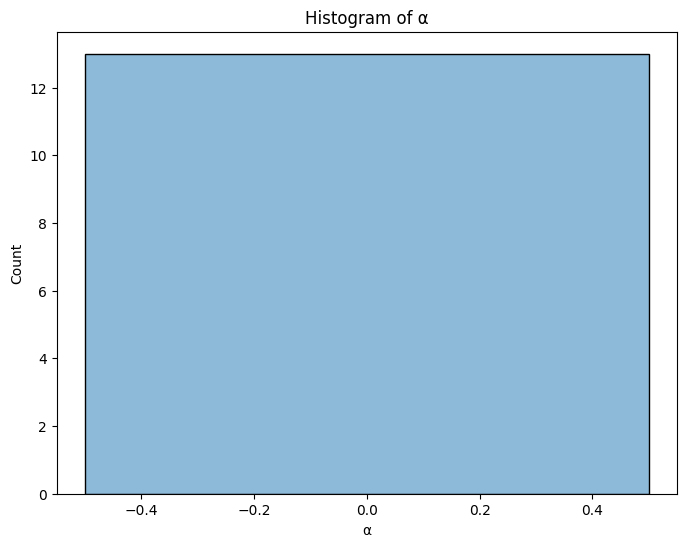

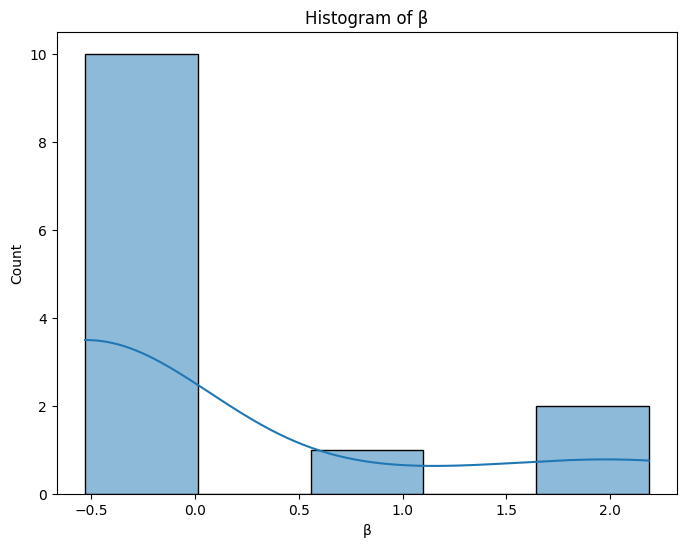

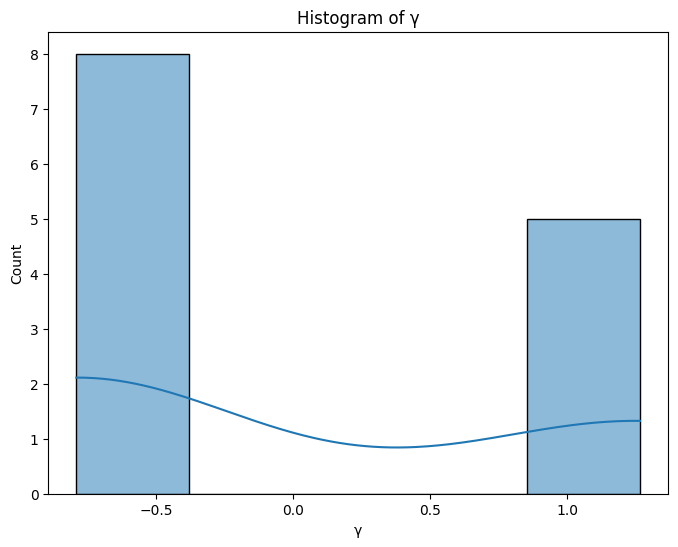

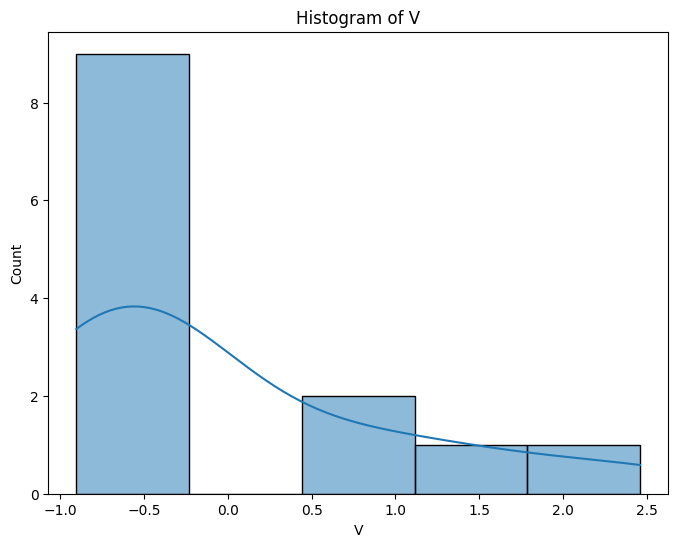

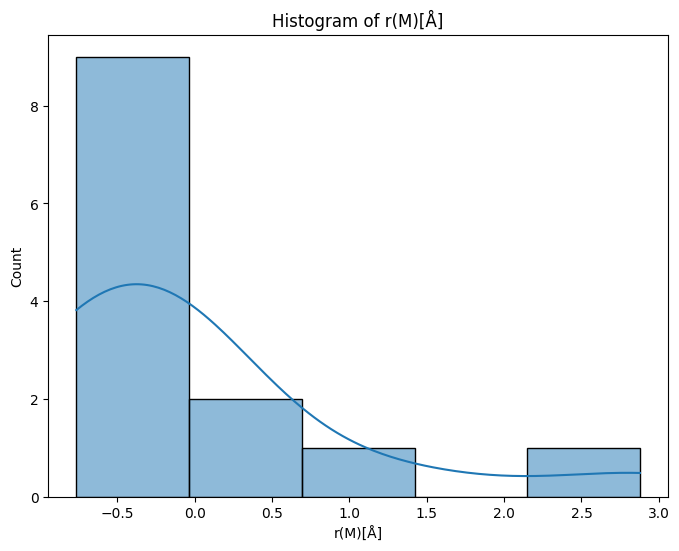

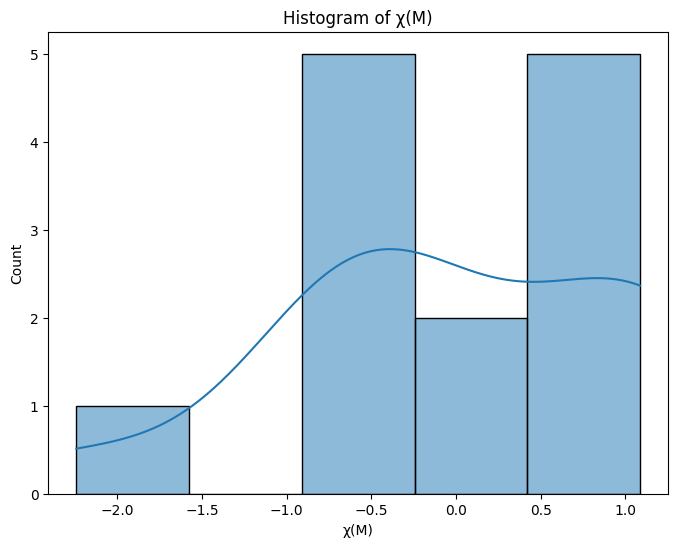

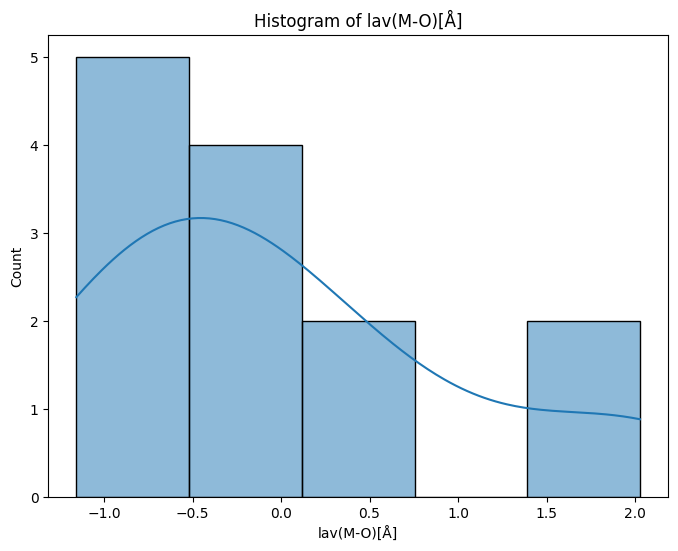

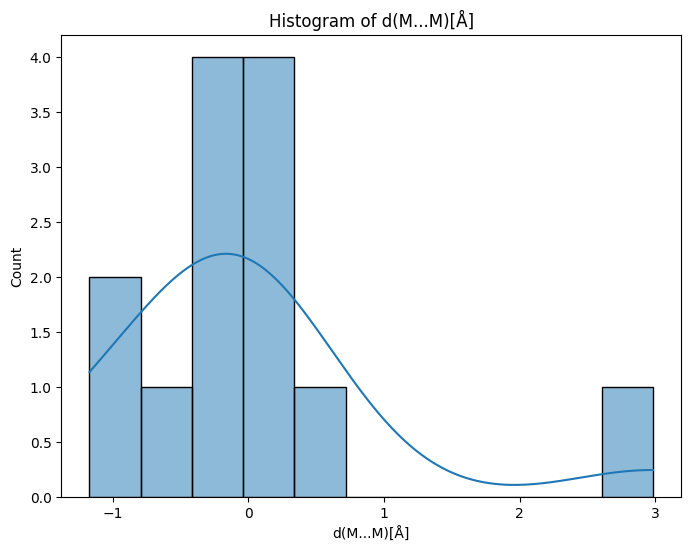

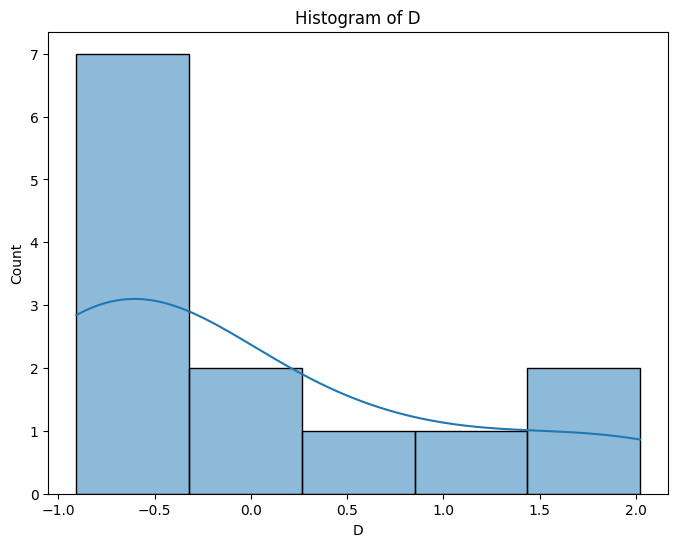

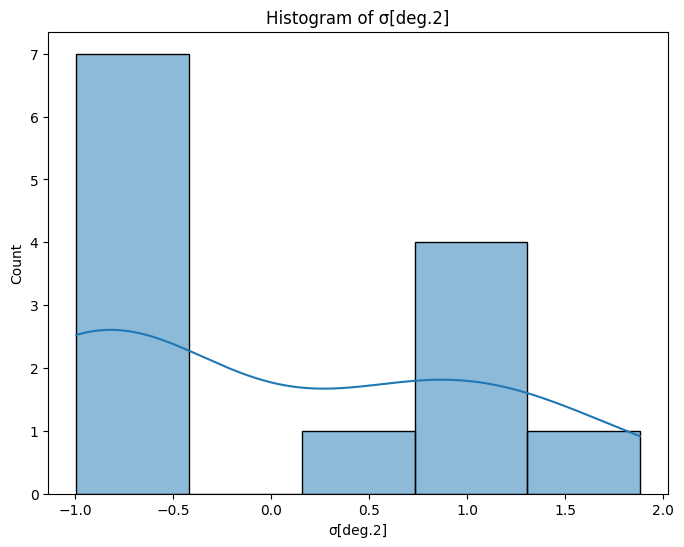

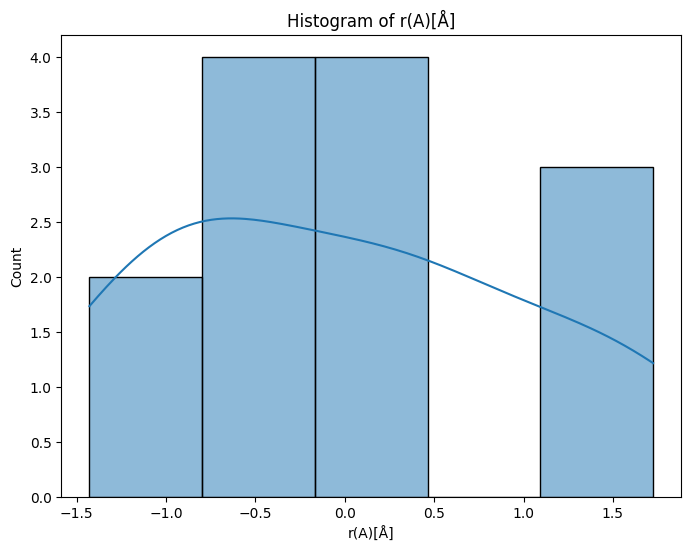

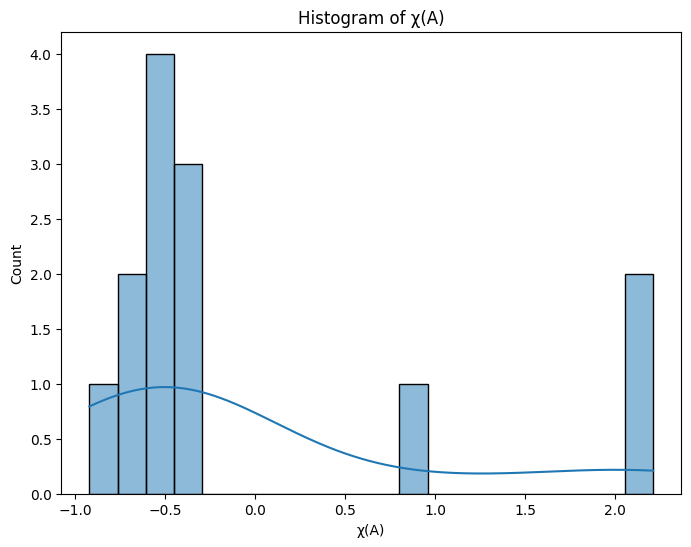

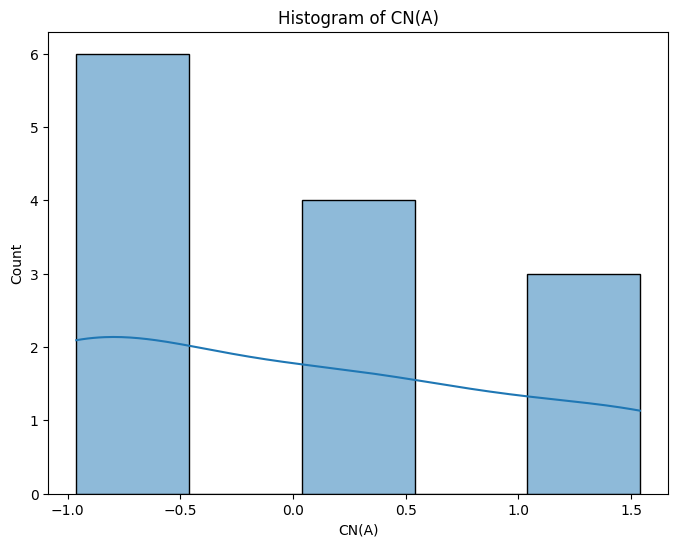

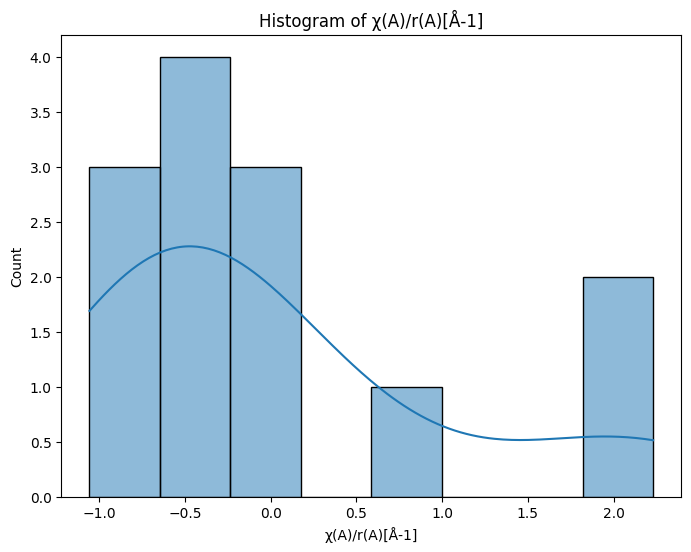

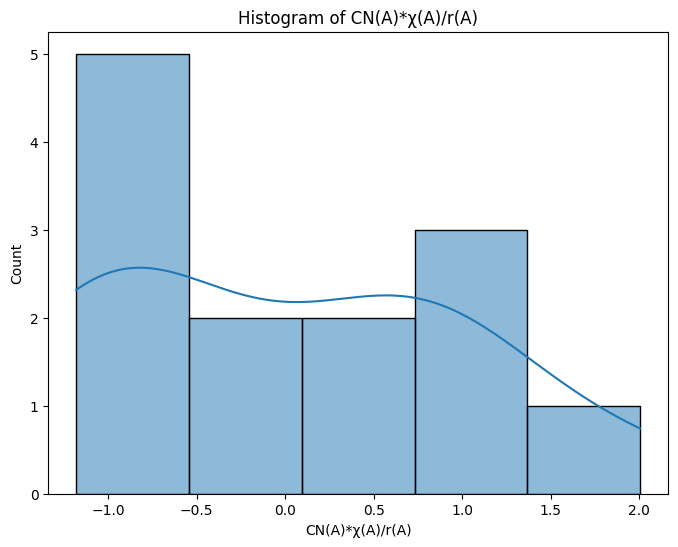

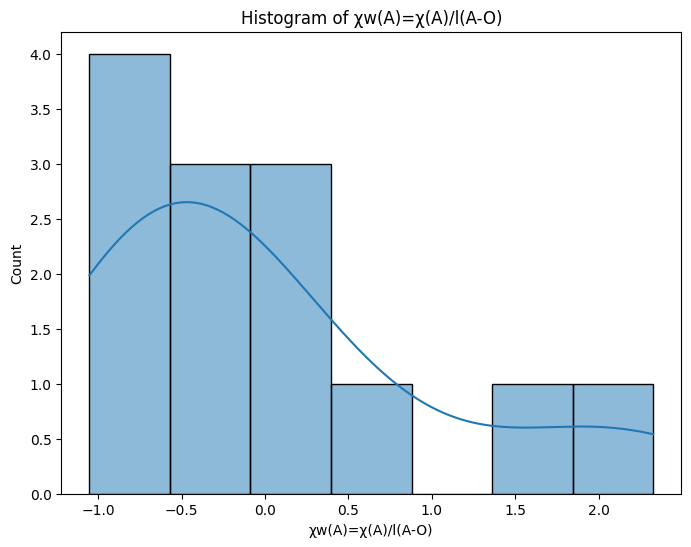

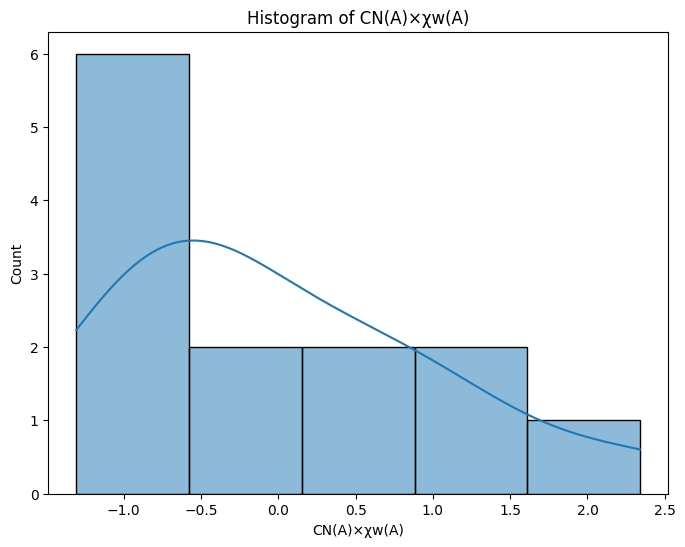

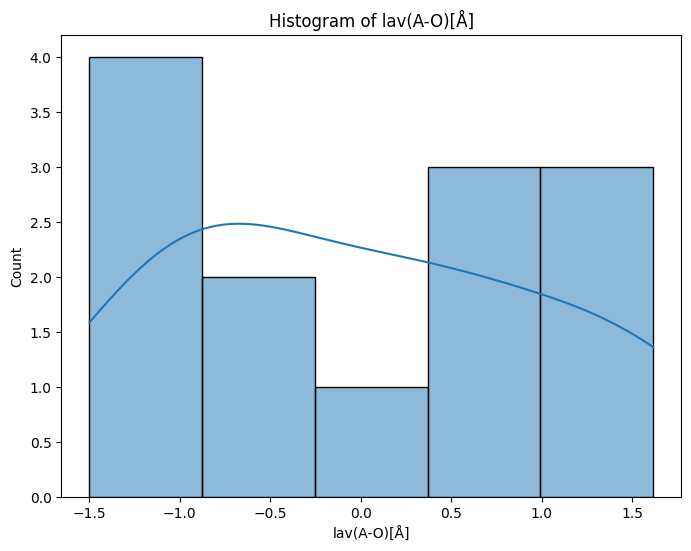

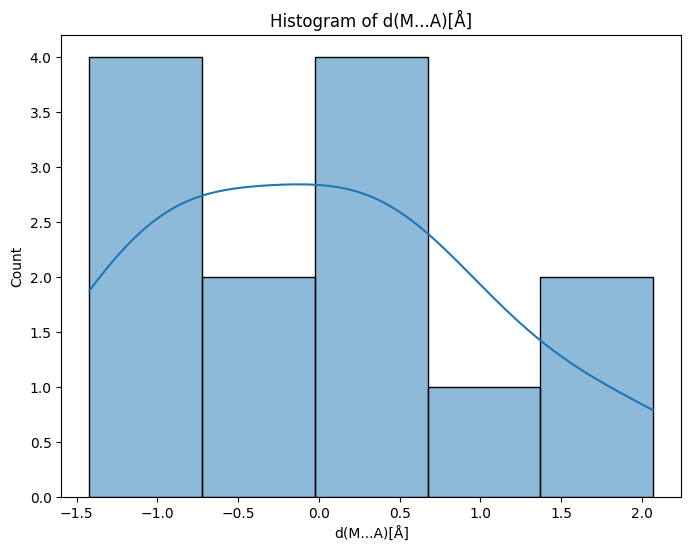

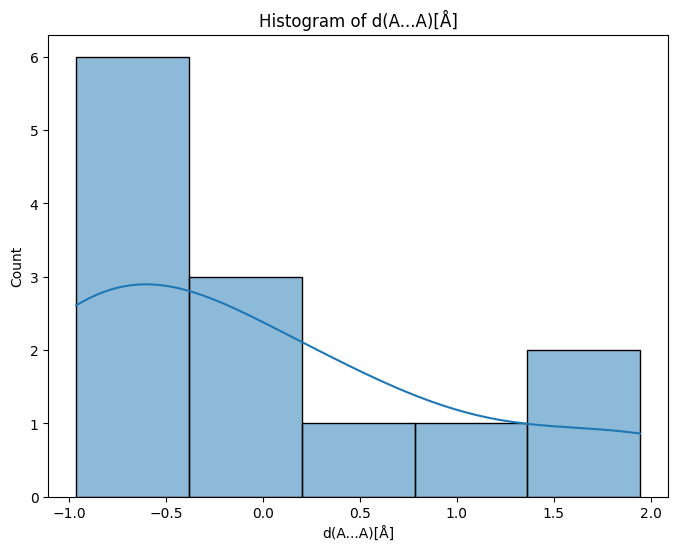

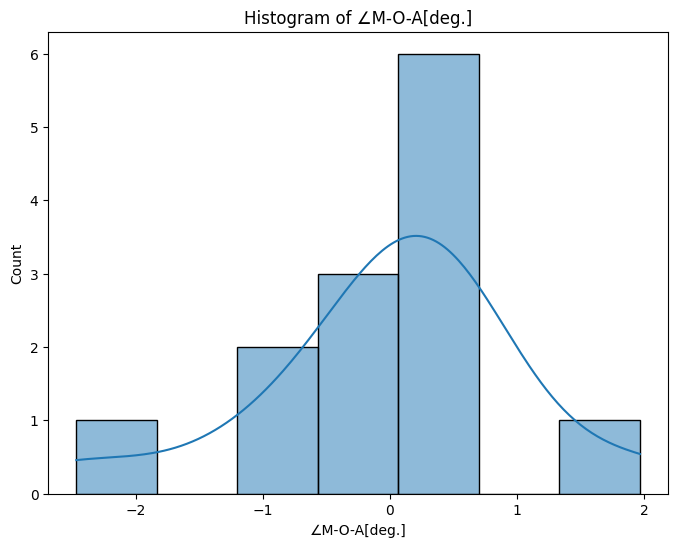

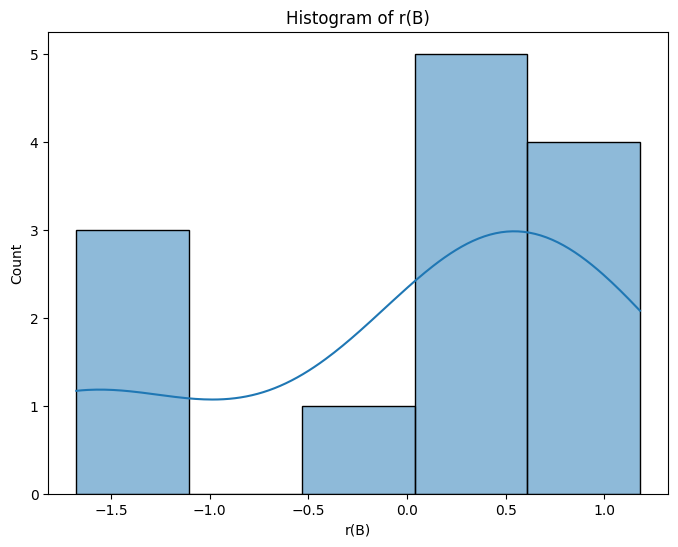

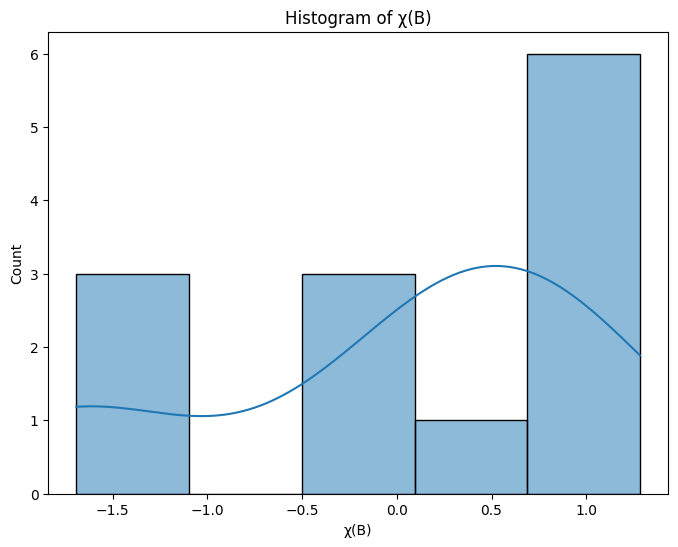

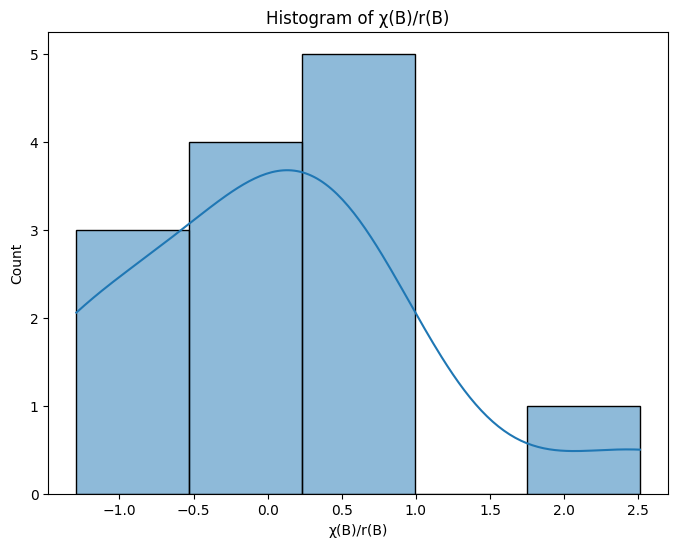

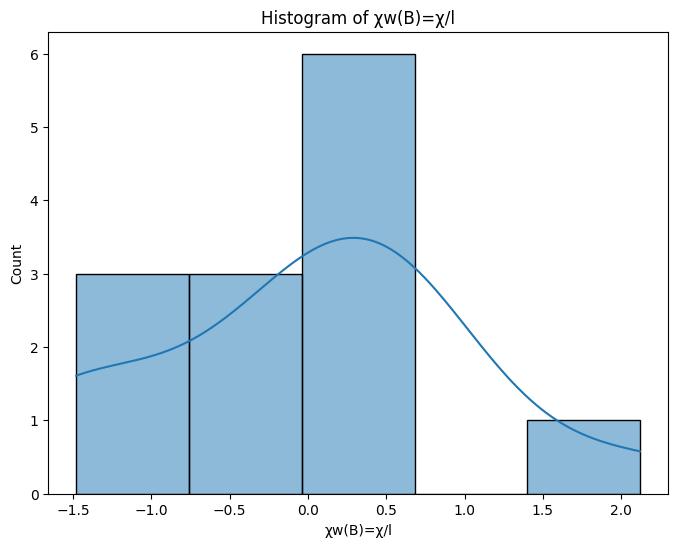

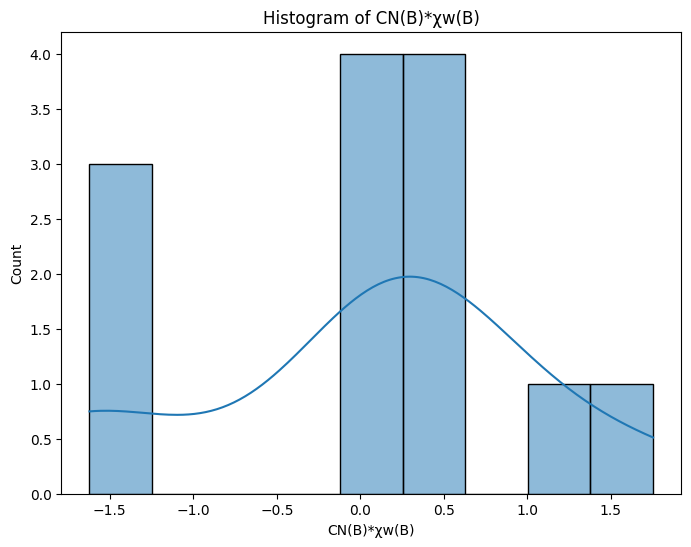

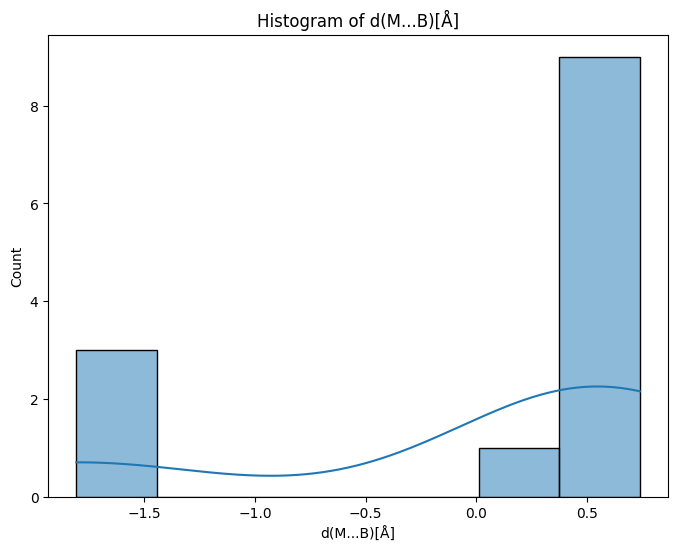

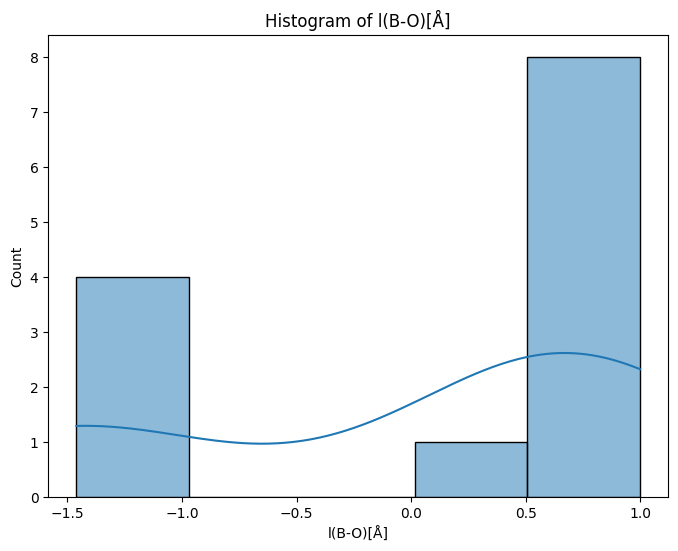

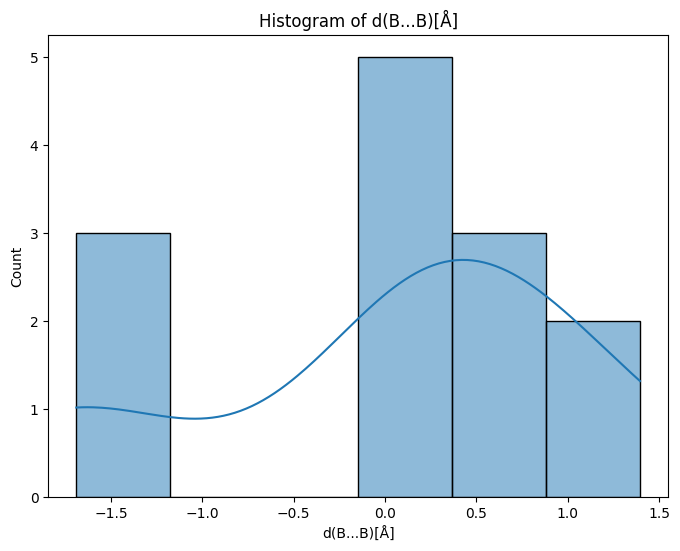

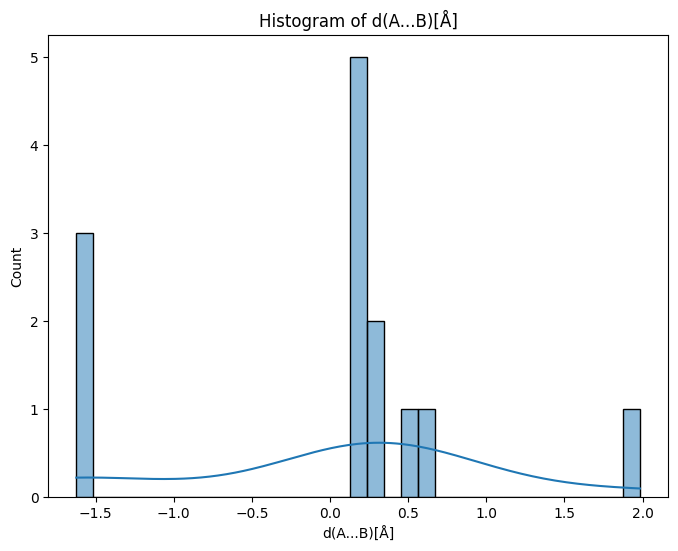

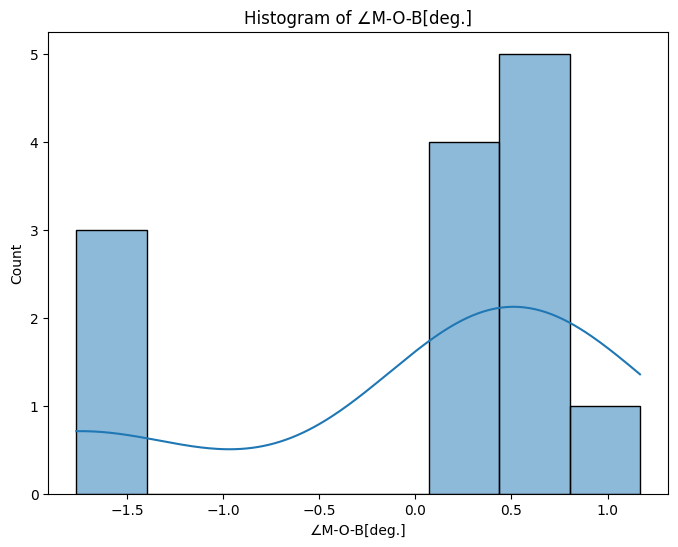

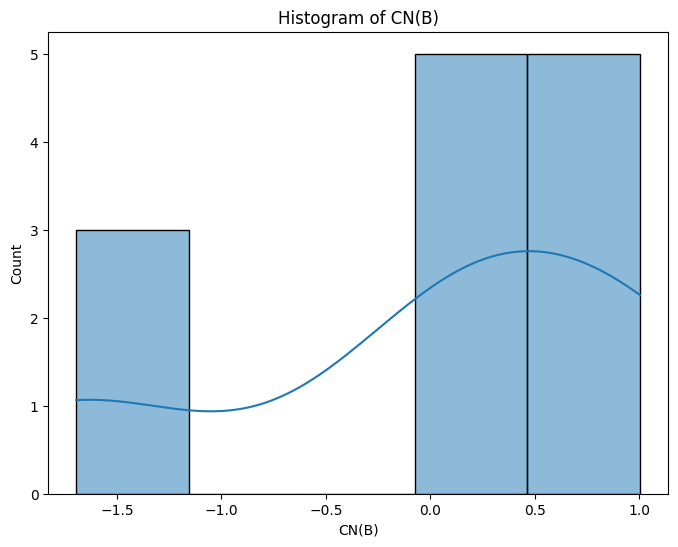

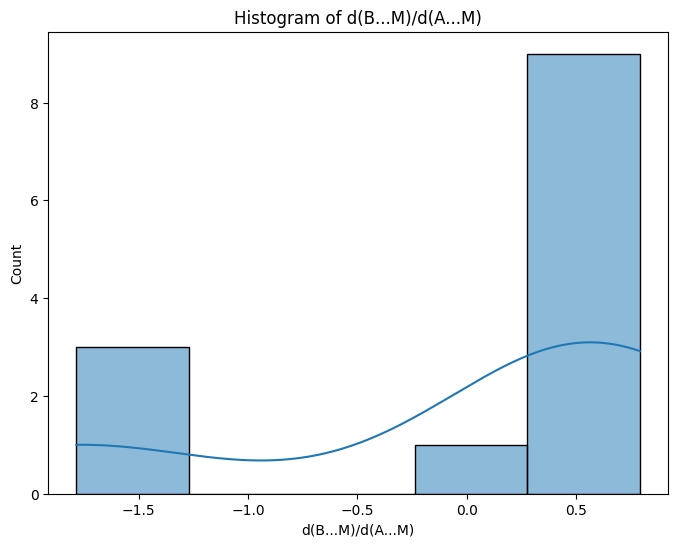

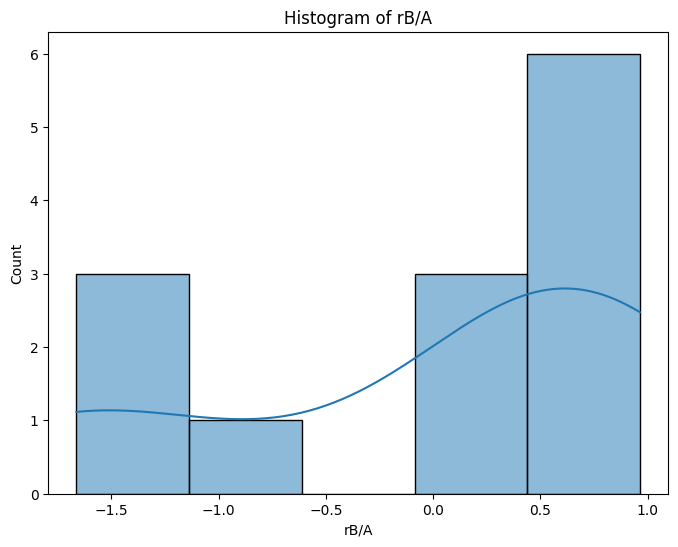

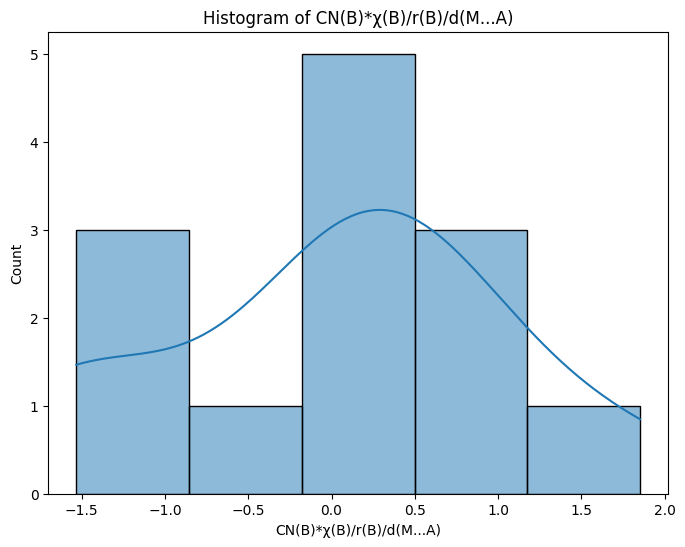

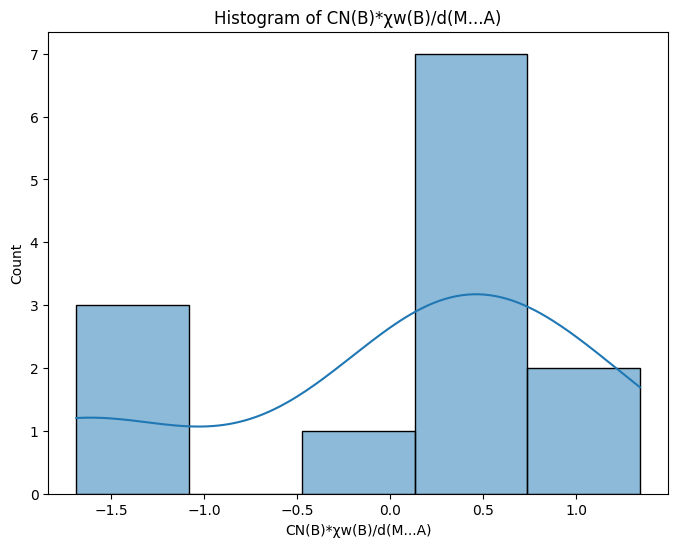

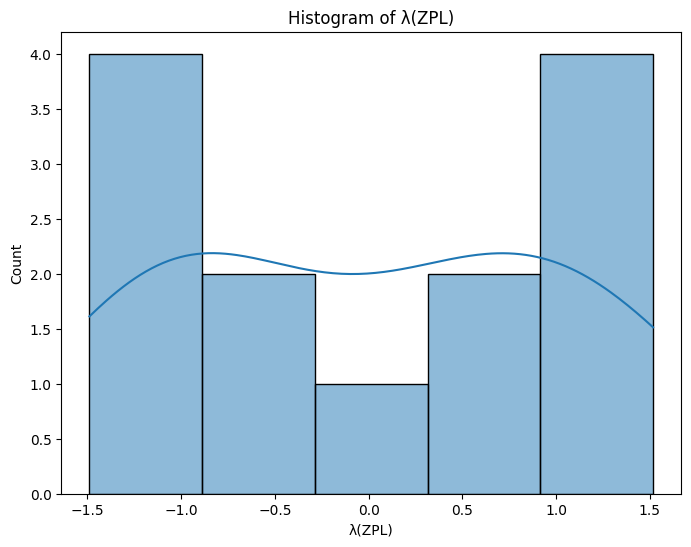

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制每个数值型特征的箱型图
for col in num_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# 绘制每个数值型特征的直方图
for col in num_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


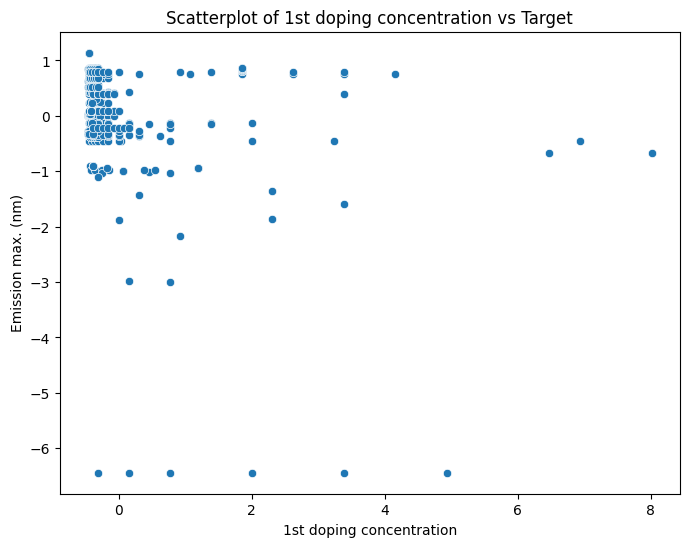

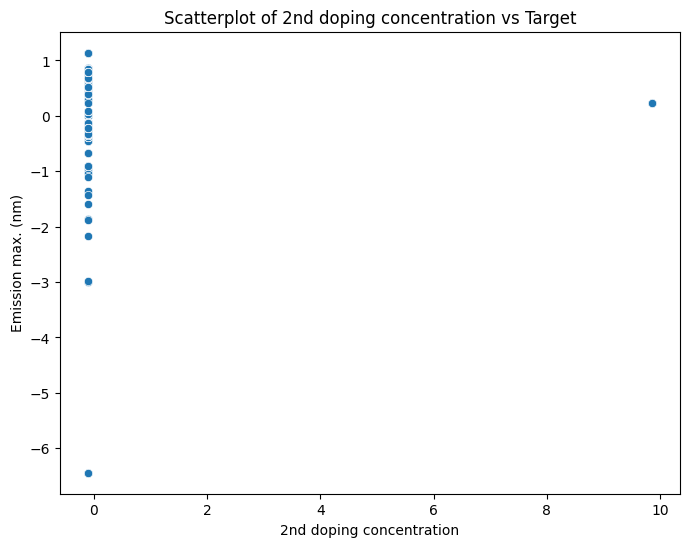

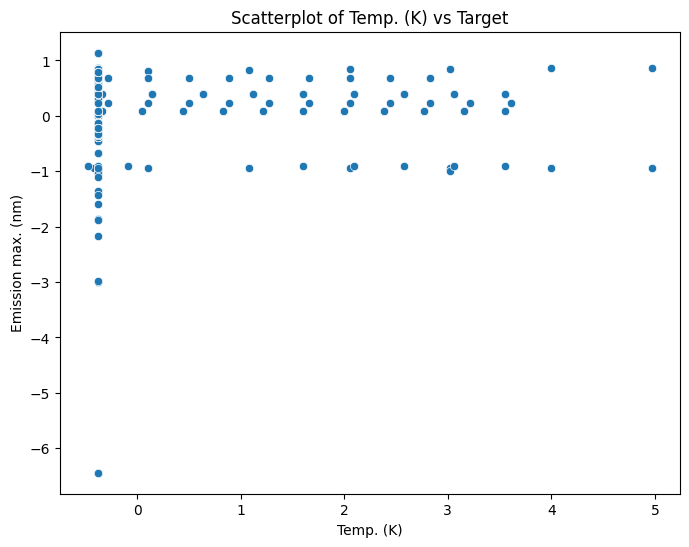

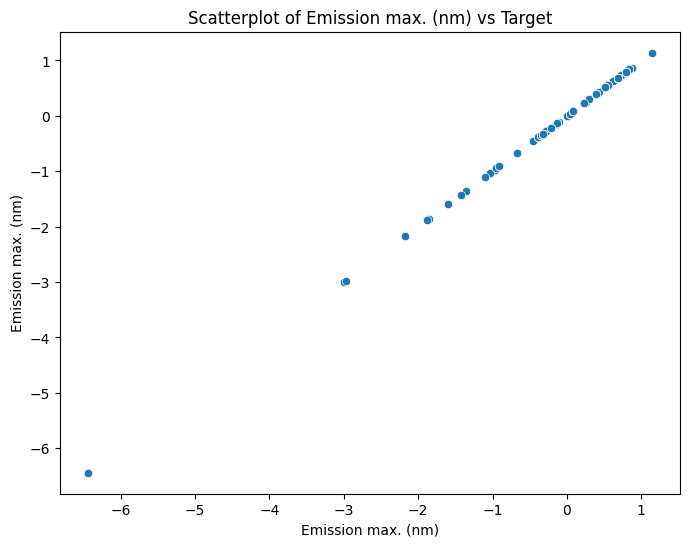

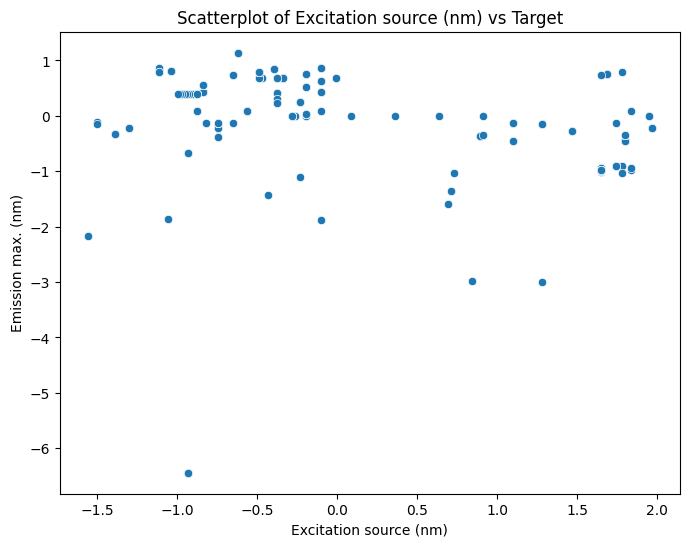

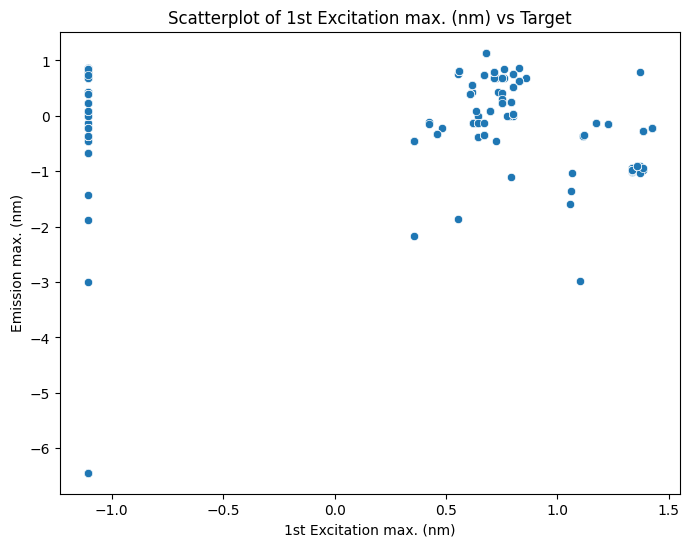

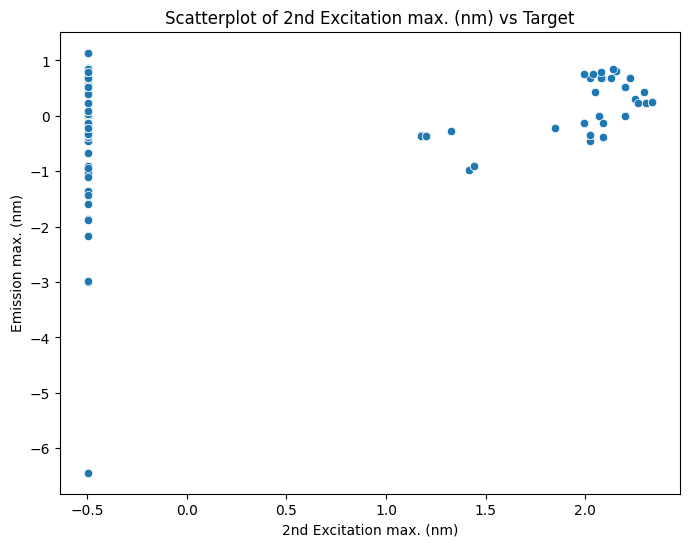

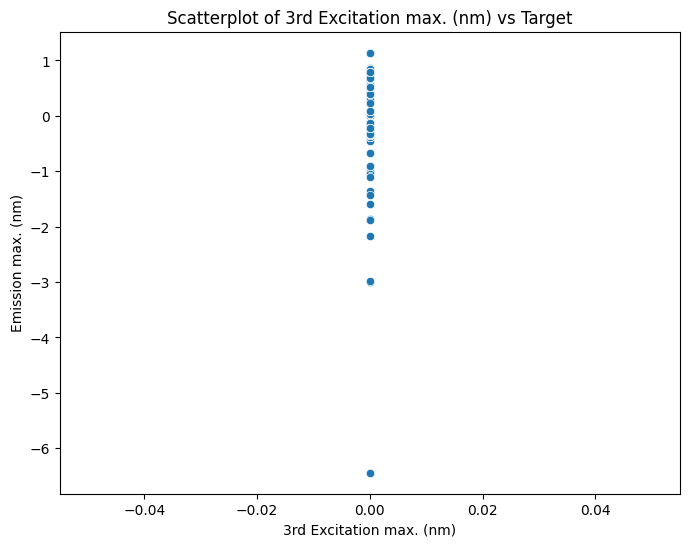

In [12]:
# 观察异常值与其他特征的关系
for col in num_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['Emission max. (nm)'])  # 假设 'target' 是目标变量
    plt.title(f'Scatterplot of {col} vs Target')
    plt.show()


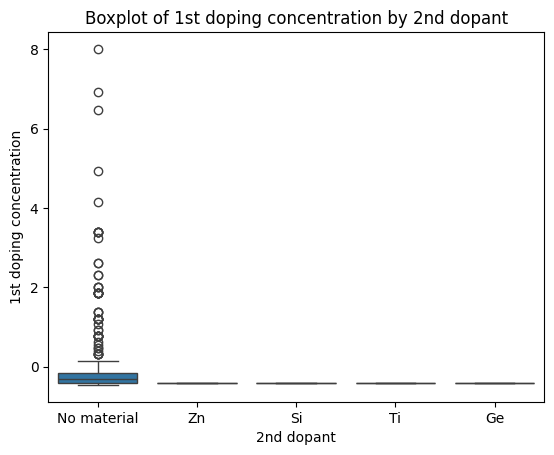

In [13]:
# 比如 '2nd dopant' 是一个分类变量
sns.boxplot(x='2nd dopant', y='1st doping concentration', data=df)
plt.title('Boxplot of 1st doping concentration by 2nd dopant')
plt.show()


In [10]:
# 筛选出数值类型的列
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 计算相关性矩阵
correlation_matrix = df[num_columns].corr()

target_correlation = correlation_matrix['λ(ZPL)'].sort_values(ascending=False)
print(target_correlation)


λ(ZPL)                      1.000000
d(A...A)[Å]                 0.810509
σ[deg.2]                    0.792298
D                           0.763209
CN(B)                       0.750671
lav(A-O)[Å]                 0.689726
r(A)[Å]                     0.663183
∠M-O-B[deg.]                0.613271
d(M...B)[Å]                 0.612001
r(B)                        0.605915
CN(A)                       0.589950
CN(B)*χw(B)                 0.582493
χ(M)                        0.581269
d(A...B)[Å]                 0.579263
d(B...B)[Å]                 0.578919
CN(B)*χw(B)/d(M...A)        0.530340
d(B...M)/d(A...M)           0.524966
rB/A                        0.474923
CN(B)*χ(B)/r(B)/d(M...A)    0.454711
d(M...A)[Å]                 0.439644
χ(B)                        0.409307
b                           0.408345
V                           0.396658
l(B-O)[Å]                   0.361217
χw(B)=χ/l                   0.350852
γ                           0.337799
c                           0.329596
χ

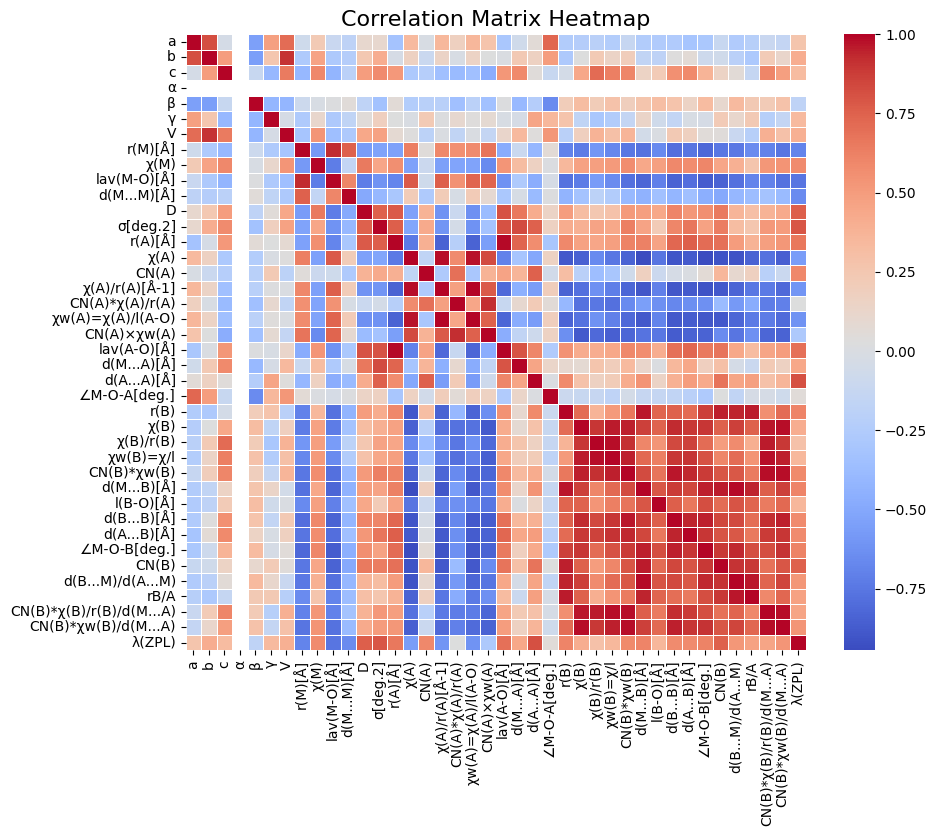

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 筛选出数值类型的列
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 计算相关性矩阵
correlation_matrix = df[num_columns].corr()

# 创建一个热图来展示相关性
plt.figure(figsize=(10, 8))  # 可以调整图的大小
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

# 设置标题
plt.title('Correlation Matrix Heatmap', fontsize=16)

# 显示图形
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

# 数据拆分
X = df.drop(columns=['λ(ZPL)'])
y = df['λ(ZPL)']



In [16]:

# 拆分为训练集和测试集，80%训练，20%测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X.dtypes)


a                           float64
b                           float64
c                           float64
α                           float64
β                           float64
γ                           float64
V                           float64
r(M)[Å]                     float64
χ(M)                        float64
lav(M-O)[Å]                 float64
d(M...M)[Å]                 float64
D                           float64
σ[deg.2]                    float64
r(A)[Å]                     float64
χ(A)                        float64
CN(A)                       float64
χ(A)/r(A)[Å-1]              float64
CN(A)*χ(A)/r(A)             float64
χw(A)=χ(A)/l(A-O)           float64
CN(A)×χw(A)                 float64
lav(A-O)[Å]                 float64
d(M...A)[Å]                 float64
d(A...A)[Å]                 float64
∠M-O-A[deg.]                float64
r(B)                        float64
χ(B)                        float64
χ(B)/r(B)                   float64
χw(B)=χ/l                   

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# 线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 0.18307758703315224
R2 Score: 0.7019258782153773


In [19]:
from sklearn.ensemble import RandomForestRegressor

# 随机森林回归模型
rf_model = RandomForestRegressor(random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 预测
y_pred_rf = rf_model.predict(X_test)

# 评估模型
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R2 Score: {r2_rf}")


Random Forest - Mean Squared Error: 0.8546844733838869
Random Forest - R2 Score: -0.3915374783737027


In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# 梯度提升回归模型
gb_model = GradientBoostingRegressor(random_state=42)

# 训练模型
gb_model.fit(X_train, y_train)

# 预测
y_pred_gb = gb_model.predict(X_test)

# 评估模型
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R2 Score: {r2_gb}")


Gradient Boosting - Mean Squared Error: 0.9645951766914137
Gradient Boosting - R2 Score: -0.5704863977582952


In [21]:
from sklearn.svm import SVR

# 支持向量机回归模型
svr_model = SVR(kernel='rbf')

# 训练模型
svr_model.fit(X_train, y_train)

# 预测
y_pred_svr = svr_model.predict(X_test)

# 评估模型
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - Mean Squared Error: {mse_svr}")
print(f"Support Vector Regression - R2 Score: {r2_svr}")


Support Vector Regression - Mean Squared Error: 0.5566325169851676
Support Vector Regression - R2 Score: 0.09372986969140584


In [22]:
from sklearn.neighbors import KNeighborsRegressor

# K 最近邻回归模型
knn_model = KNeighborsRegressor(n_neighbors=5)

# 训练模型
knn_model.fit(X_train, y_train)

# 预测
y_pred_knn = knn_model.predict(X_test)

# 评估模型
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors - Mean Squared Error: {mse_knn}")
print(f"K-Nearest Neighbors - R2 Score: {r2_knn}")


K-Nearest Neighbors - Mean Squared Error: 0.7815688133099427
K-Nearest Neighbors - R2 Score: -0.27249567474048453


In [24]:
from sklearn.tree import DecisionTreeRegressor

# 决策树回归模型
dt_model = DecisionTreeRegressor(random_state=42)

# 训练模型
dt_model.fit(X_train, y_train)

# 预测
y_pred_dt = dt_model.predict(X_test)

# 评估模型
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - Mean Squared Error: {mse_dt}")
print(f"Decision Tree - R2 Score: {r2_dt}")


Decision Tree - Mean Squared Error: 2.790007875426781
Decision Tree - R2 Score: -3.5424956747404845


In [25]:
from sklearn.linear_model import Lasso

# Lasso回归模型
lasso_model = Lasso(alpha=0.1)

# 训练模型
lasso_model.fit(X_train, y_train)

# 预测
y_pred_lasso = lasso_model.predict(X_test)

# 评估模型
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - R2 Score: {r2_lasso}")


Lasso Regression - Mean Squared Error: 0.9926768892705704
Lasso Regression - R2 Score: -0.6162070779949458


In [26]:
from sklearn.linear_model import Ridge

# Ridge回归模型
ridge_model = Ridge(alpha=0.1)

# 训练模型
ridge_model.fit(X_train, y_train)

# 预测
y_pred_ridge = ridge_model.predict(X_test)

# 评估模型
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R2 Score: {r2_ridge}")


Ridge Regression - Mean Squared Error: 0.1810502543510489
Ridge Regression - R2 Score: 0.7052266394859188


In [27]:
from sklearn.linear_model import ElasticNet

# ElasticNet回归模型
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# 训练模型
elasticnet_model.fit(X_train, y_train)

# 预测
y_pred_elasticnet = elasticnet_model.predict(X_test)

# 评估模型
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print(f"ElasticNet Regression - Mean Squared Error: {mse_elasticnet}")
print(f"ElasticNet Regression - R2 Score: {r2_elasticnet}")


ElasticNet Regression - Mean Squared Error: 0.4221065052693813
ElasticNet Regression - R2 Score: 0.31275571250038736


In [28]:
from sklearn.neighbors import KNeighborsRegressor

# K近邻回归模型
knn_model = KNeighborsRegressor(n_neighbors=5)

# 训练模型
knn_model.fit(X_train, y_train)

# 预测
y_pred_knn = knn_model.predict(X_test)

# 评估模型
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors - Mean Squared Error: {mse_knn}")
print(f"K-Nearest Neighbors - R2 Score: {r2_knn}")


K-Nearest Neighbors - Mean Squared Error: 0.7815688133099427
K-Nearest Neighbors - R2 Score: -0.27249567474048453


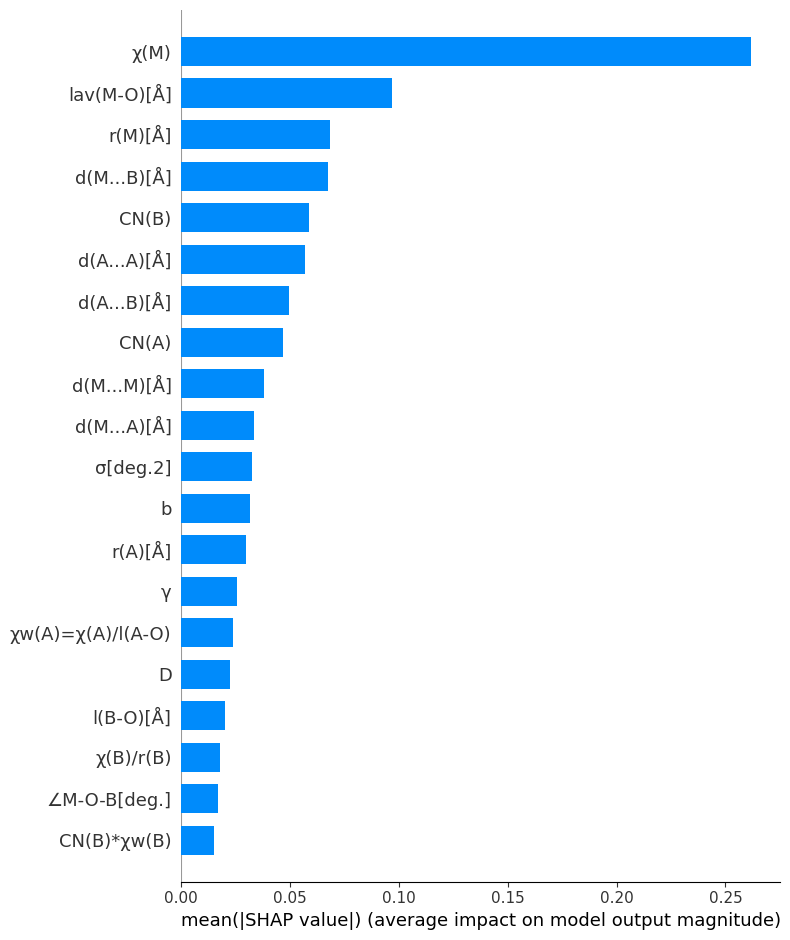

ValueError: Could not find feature named: 1st doping concentration

In [30]:
import shap
import catboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor, Pool

# 2. 训练 CatBoost 模型（如果已有模型，可直接加载）
model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=0)
model.fit(X_train, y_train)

# 3. 计算 SHAP 值
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 4. 贡献度图 —— SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 5. 贡献度图 —— SHAP Force Plot (可视化单个样本)
shap.initjs()
sample_idx = 0  # 选择测试集中的第一个样本
shap.force_plot(explainer.expected_value, shap_values[sample_idx, :], X_test.iloc[sample_idx, :])

# 6. 贡献度图 —— SHAP Dependence Plot（分析某个特征）
shap.dependence_plot('1st doping concentration', shap_values, X_test)

plt.show()


In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1. 创建并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)  

# 2. 生成预测值
y_pred = model.predict(X_test)

# 3. 创建新的 DataFrame，包含真实值和预测值
results_df = pd.DataFrame({
    'Actual': y_test.values,   # 真实值
    'Predicted': y_pred        # 预测值
})

# 4. 保存到 CSV 文件
results_df.to_csv("Mn_prediction_linear_regression_predictions.csv", index=False)

# 5. 显示前几行数据
print(results_df.head())


     Actual  Predicted
0 -0.682678  -1.180448
1  0.979822   0.607173
2  0.979822   0.576597


筛选特征拟合/降维

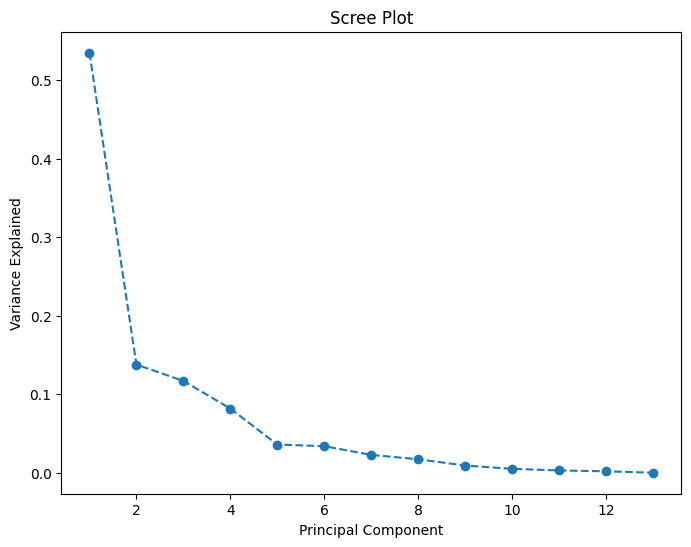

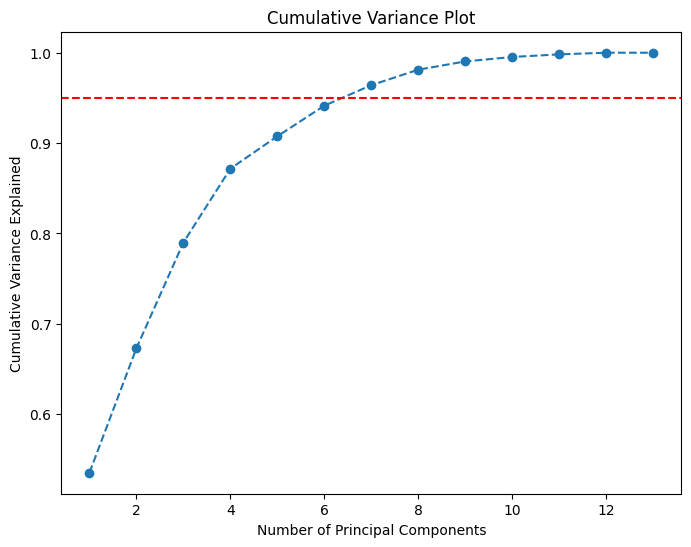

Selected 7 principal components
R²: 0.9314
MSE: 0.0686


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 读取数据
# df = pd.read_csv("your_data.csv")  # 确保数据已加载

# 1. 选择除 λ(ZPL) 之外的所有变量作为 X
X = df.drop(columns=["λ(ZPL)"])
y = df["λ(ZPL)"]

# 2. 标准化数据（PCA 对数据要求零均值、单位方差）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 进行 PCA 降维
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. 画碎石图（解释方差贡献率）
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.show()

# 5. 计算累计方差贡献率，并选择适当的主成分数目
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')  # 一般选择贡献率达到 95% 的主成分
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance Plot")
plt.show()

# 6. 选择合适的主成分（如方差贡献率达到 95% 时的主成分个数）
num_components = np.argmax(cumulative_variance >= 0.95) + 1  # 找到第一个达到95%位置的索引
pca = PCA(n_components=num_components)
X_pca_reduced = pca.fit_transform(X_scaled)

# 7. 线性回归
model = LinearRegression()
model.fit(X_pca_reduced, y)
y_pred = model.predict(X_pca_reduced)

# 8. 计算 R² 和 MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# 输出结果
print(f"Selected {num_components} principal components")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")


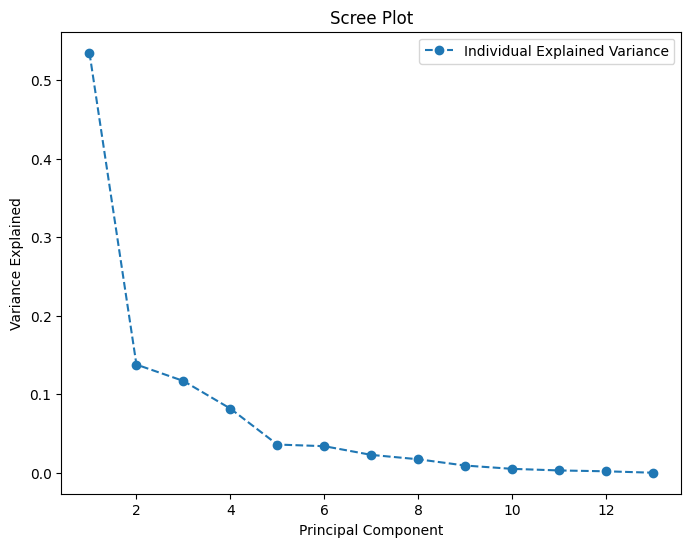

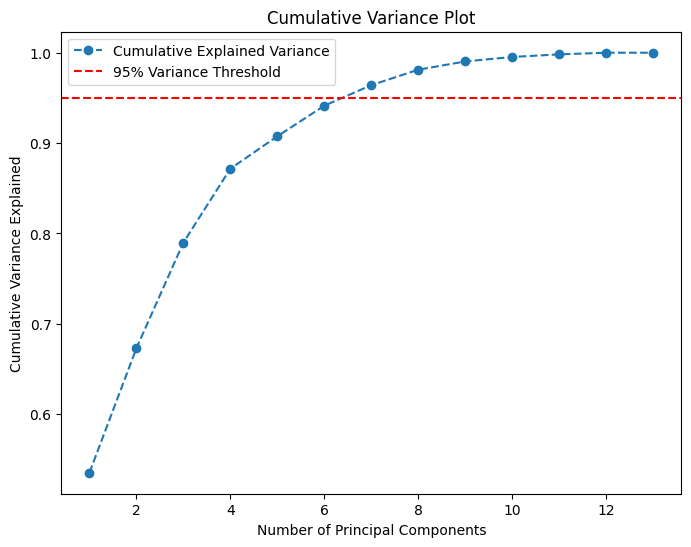


主成分载荷矩阵（每个变量对主成分的贡献）：
                                   PC1           PC2           PC3  \
a                        -4.847905e-02  2.978342e-01 -1.220472e-01   
b                         1.006592e-02  3.461056e-01 -2.330581e-01   
c                         1.082815e-01  1.726342e-01 -2.538360e-01   
α                        -5.004329e-17  1.085969e-17  6.445934e-18   
β                         4.549287e-02 -3.284483e-01 -2.002323e-02   
γ                        -8.759361e-04  1.505442e-01  1.740847e-01   
V                         4.362310e-02  3.205060e-01 -2.823336e-01   
r(M)[Å]                  -1.809291e-01 -5.901764e-02  3.846749e-02   
χ(M)                      1.393184e-01  1.455818e-01 -1.330973e-01   
lav(M-O)[Å]              -1.959944e-01 -1.009441e-01 -2.709647e-03   
d(M...M)[Å]              -9.452188e-02 -1.207030e-01 -6.932275e-02   
D                         1.388401e-01  2.356632e-01  9.325316e-02   
σ[deg.2]                  1.410548e-01  2.880218e-01  8.110317e-02 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 读取数据
# df = pd.read_csv("your_data.csv")  # 确保数据已加载

# 1. 选择除 λ(ZPL) 之外的所有变量作为 X
X = df.drop(columns=["λ(ZPL)"])
y = df["λ(ZPL)"]

# 2. 标准化数据（PCA 需要零均值、单位方差）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 进行 PCA 降维
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. 计算累计方差贡献率
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 5. 画 **碎石图**
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label="Individual Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.legend()
plt.show()

# 6. 画 **累计方差贡献率曲线**
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label="Cumulative Explained Variance")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance Plot")
plt.legend()
plt.show()

# 7. **选择合适的主成分（累计贡献率 ≥ 95%）**
num_components = np.argmax(cumulative_variance >= 0.95) + 1  # 找到第一个 ≥95% 的索引
pca = PCA(n_components=num_components)
X_pca_reduced = pca.fit_transform(X_scaled)

# 8. **输出主成分载荷矩阵**
loading_matrix = pd.DataFrame(pca.components_.T, 
                              index=X.columns, 
                              columns=[f"PC{i+1}" for i in range(num_components)])
print("\n主成分载荷矩阵（每个变量对主成分的贡献）：")
print(loading_matrix)

# 9. **输出方差贡献率**
explained_variance_selected = pca.explained_variance_ratio_
print("\n选取的主成分方差贡献率：")
for i, var in enumerate(explained_variance_selected, 1):
    print(f"PC{i}: {var:.4f}")

# 10. **线性回归**
model = LinearRegression()
model.fit(X_pca_reduced, y)
y_pred = model.predict(X_pca_reduced)

# 11. **计算 R² 和 MSE**
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# 12. **输出结果**
print(f"\n选取了 {num_components} 个主成分")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")


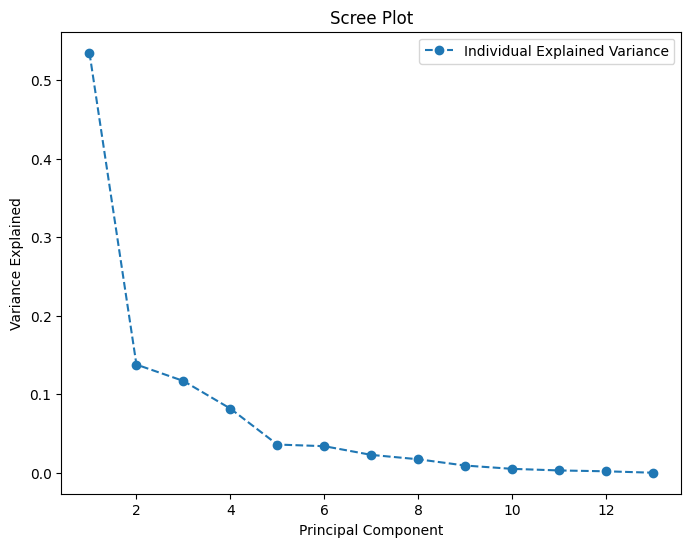

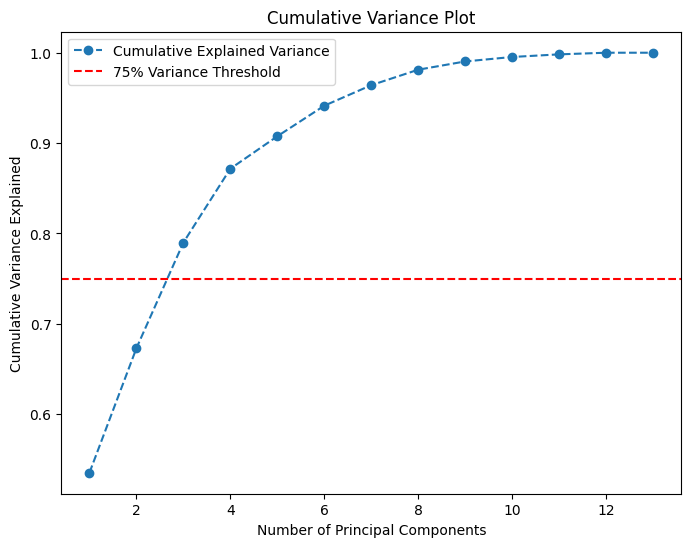


主成分载荷矩阵（每个变量对主成分的贡献）：
                                   PC1           PC2           PC3
a                        -4.847905e-02  2.978342e-01 -1.220472e-01
b                         1.006592e-02  3.461056e-01 -2.330581e-01
c                         1.082815e-01  1.726342e-01 -2.538360e-01
α                        -5.004329e-17  1.085969e-17  6.445934e-18
β                         4.549287e-02 -3.284483e-01 -2.002323e-02
γ                        -8.759361e-04  1.505442e-01  1.740847e-01
V                         4.362310e-02  3.205060e-01 -2.823336e-01
r(M)[Å]                  -1.809291e-01 -5.901764e-02  3.846749e-02
χ(M)                      1.393184e-01  1.455818e-01 -1.330973e-01
lav(M-O)[Å]              -1.959944e-01 -1.009441e-01 -2.709647e-03
d(M...M)[Å]              -9.452188e-02 -1.207030e-01 -6.932275e-02
D                         1.388401e-01  2.356632e-01  9.325316e-02
σ[deg.2]                  1.410548e-01  2.880218e-01  8.110317e-02
r(A)[Å]                   1.683004e-01 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 读取数据
# df = pd.read_csv("your_data.csv")  # 确保数据已加载

# 1. 选择除 λ(ZPL) 之外的所有变量作为 X
X = df.drop(columns=["λ(ZPL)"])
y = df["λ(ZPL)"]

# 2. 标准化数据（PCA 需要零均值、单位方差）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 进行 PCA 降维
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. 计算累计方差贡献率
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 5. 画 **碎石图**
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label="Individual Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.legend()
plt.show()

# 6. 画 **累计方差贡献率曲线**
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label="Cumulative Explained Variance")
plt.axhline(y=0.75, color='r', linestyle='--', label="75% Variance Threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance Plot")
plt.legend()
plt.show()

# 7. **选择合适的主成分（累计贡献率 ≥ 75%）**
num_components = np.argmax(cumulative_variance >= 0.75) + 1  # 找到第一个 ≥75% 的索引
pca = PCA(n_components=num_components)
X_pca_reduced = pca.fit_transform(X_scaled)

# 8. **输出主成分载荷矩阵**
loading_matrix = pd.DataFrame(pca.components_.T, 
                              index=X.columns, 
                              columns=[f"PC{i+1}" for i in range(num_components)])
print("\n主成分载荷矩阵（每个变量对主成分的贡献）：")
print(loading_matrix)

# 9. **输出方差贡献率**
explained_variance_selected = pca.explained_variance_ratio_
print("\n选取的主成分方差贡献率：")
for i, var in enumerate(explained_variance_selected, 1):
    print(f"PC{i}: {var:.4f}")

# 10. **线性回归**
model = LinearRegression()
model.fit(X_pca_reduced, y)
y_pred = model.predict(X_pca_reduced)

# 11. **计算 R² 和 MSE**
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# 12. **输出结果**
print(f"\n选取了 {num_components} 个主成分")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 读取数据
# df = pd.read_csv("your_data.csv")  # 确保数据已加载

# 1. 选择除 λ(ZPL) 之外的所有变量作为 X
X = df.drop(columns=["λ(ZPL)"])
y = df["λ(ZPL)"]

# 2. 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 进行 PCA 降维，选取 3 个主成分
pca = PCA(n_components=3)
X_pca_reduced = pca.fit_transform(X_scaled)

# 4. **输出主成分载荷矩阵**
loading_matrix = pd.DataFrame(pca.components_.T, 
                              index=X.columns, 
                              columns=[f"PC{i+1}" for i in range(3)])
print("\n主成分载荷矩阵（每个变量对主成分的贡献）：")
print(loading_matrix)

# 5. **输出方差贡献率**
explained_variance_selected = pca.explained_variance_ratio_
print("\n选取的 3 个主成分方差贡献率：")
for i, var in enumerate(explained_variance_selected, 1):
    print(f"PC{i}: {var:.4f}")

# 6. **线性回归**
model = LinearRegression()
model.fit(X_pca_reduced, y)
y_pred = model.predict(X_pca_reduced)

# 7. **计算 R² 和 MSE**
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# 8. **输出结果**
print(f"\nR²: {r2:.4f}")
print(f"MSE: {mse:.4f}")

# 9. **保存真实值和预测值到 CSV**
results_df = pd.DataFrame({
    'Actual': y.values,   # 真实值
    'Predicted': y_pred   # 预测值
})
results_df.to_csv("Mn_pca_linear_regression_results.csv", index=False)

# 10. **显示前几行数据**
print("\n预测值和真实值对比：")
print(results_df.head())



主成分载荷矩阵（每个变量对主成分的贡献）：
                                   PC1           PC2           PC3
a                        -4.847905e-02  2.978342e-01 -1.220472e-01
b                         1.006592e-02  3.461056e-01 -2.330581e-01
c                         1.082815e-01  1.726342e-01 -2.538360e-01
α                        -5.004329e-17  1.085969e-17  6.445934e-18
β                         4.549287e-02 -3.284483e-01 -2.002323e-02
γ                        -8.759361e-04  1.505442e-01  1.740847e-01
V                         4.362310e-02  3.205060e-01 -2.823336e-01
r(M)[Å]                  -1.809291e-01 -5.901764e-02  3.846749e-02
χ(M)                      1.393184e-01  1.455818e-01 -1.330973e-01
lav(M-O)[Å]              -1.959944e-01 -1.009441e-01 -2.709647e-03
d(M...M)[Å]              -9.452188e-02 -1.207030e-01 -6.932275e-02
D                         1.388401e-01  2.356632e-01  9.325316e-02
σ[deg.2]                  1.410548e-01  2.880218e-01  8.110317e-02
r(A)[Å]                   1.683004e-01 

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# 1. 读取数据
# df = pd.read_csv("your_data.csv")  # 确保数据已加载

# 2. 选取自变量（去掉 λ(ZPL)）
X = df.drop(columns=["λ(ZPL)"])
y = df["λ(ZPL)"]

# 3. **数据标准化**（Lasso 回归对数据缩放敏感）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. **Lasso 回归进行特征选择**
lasso = Lasso(alpha=0.01)  # 调整 alpha 以改变特征选择的严格程度
lasso.fit(X_scaled, y)

# 5. **筛选出关键变量**
selected_features = X.columns[lasso.coef_ != 0]
print("\n选出的关键变量：", list(selected_features))

# 6. **使用关键变量进行回归**
X_selected = X[selected_features]  # 仅保留选出的特征
model = LinearRegression()
model.fit(X_selected, y)

# 7. **生成预测值**
y_pred = model.predict(X_selected)

# 8. **计算模型评估指标**
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"\n最终模型的 R²: {r2:.4f}")
print(f"最终模型的 MSE: {mse:.4f}")

# 9. **保存真实值和预测值**
results_df = pd.DataFrame({
    'Actual': y.values,
    'Predicted': y_pred
})
results_df.to_csv("selected_features_regression_results.csv", index=False)

# 10. **输出前几行数据**
print("\n预测值和真实值对比：")
print(results_df.head())



选出的关键变量： ['a', 'β', 'V', 'χ(M)', 'd(M...M)[Å]', 'D', 'CN(A)', 'd(A...A)[Å]', 'rB/A']

最终模型的 R²: 0.9974
最终模型的 MSE: 0.0026

预测值和真实值对比：
     Actual  Predicted
0  0.979822   0.971960
1  0.441954   0.444100
2  1.517690   1.523137
3  1.346550   1.345812
4 -1.049406  -0.927064


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# 假设你的自变量数据为 X（去掉 λ(ZPL)）
X = df.drop(columns=["λ(ZPL)"])

# 计算 VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 输出 VIF 结果
print(vif_data)

# 筛选 VIF > 10 的变量
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"]
print("高 VIF 变量（可能需要去掉）：", high_vif_features.tolist())


                     Feature       VIF
0                          a       inf
1                          b       inf
2                          c       inf
3                          α       NaN
4                          β       inf
5                          γ       inf
6                          V       inf
7                    r(M)[Å]       inf
8                       χ(M)       inf
9                lav(M-O)[Å]       inf
10               d(M...M)[Å]       inf
11                         D       inf
12                  σ[deg.2]       inf
13                   r(A)[Å]       inf
14                      χ(A)       inf
15                     CN(A)       inf
16            χ(A)/r(A)[Å-1]       inf
17           CN(A)*χ(A)/r(A)       inf
18         χw(A)=χ(A)/l(A-O)       inf
19               CN(A)×χw(A)       inf
20               lav(A-O)[Å]       inf
21               d(M...A)[Å]       inf
22               d(A...A)[Å]       inf
23              ∠M-O-A[deg.]       inf
24                      r

/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [38]:
# 检查是否有完全重复的列
duplicates = df.T.duplicated()
print("重复列：", df.columns[duplicates].tolist())

# 检查是否有方差为 0 的列
zero_variance = df.var() == 0
print("方差为 0 的列：", df.columns[zero_variance].tolist())


重复列： []
方差为 0 的列： ['α']


In [39]:
def calculate_vif(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

X_filtered = df.drop(columns=["λ(ZPL)"])  # 先去掉目标变量

# 迭代去除 VIF 最高的变量
while True:
    vif_result = calculate_vif(X_filtered)
    max_vif = vif_result["VIF"].max()
    
    if max_vif < 10:  # 终止条件：所有 VIF < 10
        break
    
    # 找到 VIF 最高的变量
    drop_feature = vif_result.sort_values(by="VIF", ascending=False)["Feature"].iloc[0]
    print(f"删除变量: {drop_feature}, VIF={max_vif}")
    X_filtered = X_filtered.drop(columns=[drop_feature])

print("最终筛选出的变量：", X_filtered.columns.tolist())


删除变量: a, VIF=inf
删除变量: b, VIF=inf
删除变量: c, VIF=inf
删除变量: β, VIF=inf
删除变量: γ, VIF=inf
删除变量: V, VIF=inf
删除变量: r(M)[Å], VIF=inf
删除变量: χ(M), VIF=inf
删除变量: lav(M-O)[Å], VIF=inf
删除变量: d(M...M)[Å], VIF=inf
删除变量: D, VIF=inf
删除变量: σ[deg.2], VIF=inf
删除变量: r(A)[Å], VIF=inf
删除变量: χ(A), VIF=inf
删除变量: CN(A), VIF=inf
删除变量: χ(A)/r(A)[Å-1], VIF=inf
删除变量: CN(A)*χ(A)/r(A), VIF=inf
删除变量: χw(A)=χ(A)/l(A-O), VIF=inf
删除变量: CN(A)×χw(A), VIF=inf
删除变量: lav(A-O)[Å], VIF=inf
删除变量: d(M...A)[Å], VIF=inf
删除变量: CN(B)*χw(B)/d(M...A), VIF=inf
删除变量: r(B), VIF=inf
删除变量: χ(B), VIF=inf
删除变量: χ(B)/r(B), VIF=inf
删除变量: χw(B)=χ/l, VIF=inf
删除变量: CN(B)*χw(B), VIF=21372468.45126364
删除变量: d(M...B)[Å], VIF=151947.11626103972
删除变量: d(B...M)/d(A...M), VIF=297.6276904735103
删除变量: d(B...B)[Å], VIF=207.8064479129205
删除变量: ∠M-O-B[deg.], VIF=39.19960075885307
删除变量: CN(B), VIF=17.092003429787123
最终筛选出的变量： ['α', 'd(A...A)[Å]', '∠M-O-A[deg.]', 'l(B-O)[Å]', 'd(A...B)[Å]', 'rB/A', 'CN(B)*χ(B)/r(B)/d(M...A)']


/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered i

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 选出的变量作为自变量
X_selected = X_filtered  
y = df["λ(ZPL)"]  # 目标变量

# 训练模型
model = LinearRegression()
model.fit(X_selected, y)

# 预测
y_pred = model.predict(X_selected)

# 计算 R² 和 MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"R²: {r2}, MSE: {mse}")

# 保存预测结果
results_df = pd.DataFrame({"Actual": y, "Predicted": y_pred})
results_df.to_csv("filtered_regression_results.csv", index=False)

# 输出前几行
print(results_df.head())


R²: 0.7596240303202777, MSE: 0.24037596967972227
     Actual  Predicted
0  0.979822   0.877734
1  0.441954   0.785907
2  1.517690   0.694869
3  1.346550   0.640409
4 -1.049406  -0.572829


0:	learn: 0.9809050	total: 3.05ms	remaining: 3.05s
100:	learn: 0.0522287	total: 36.2ms	remaining: 322ms
200:	learn: 0.0041531	total: 66.5ms	remaining: 264ms
300:	learn: 0.0003302	total: 97.3ms	remaining: 226ms
400:	learn: 0.0000263	total: 129ms	remaining: 193ms
500:	learn: 0.0000021	total: 161ms	remaining: 161ms
600:	learn: 0.0000002	total: 193ms	remaining: 128ms
700:	learn: 0.0000000	total: 226ms	remaining: 96.5ms
800:	learn: 0.0000000	total: 261ms	remaining: 64.8ms
900:	learn: 0.0000000	total: 291ms	remaining: 32ms
999:	learn: 0.0000000	total: 320ms	remaining: 0us


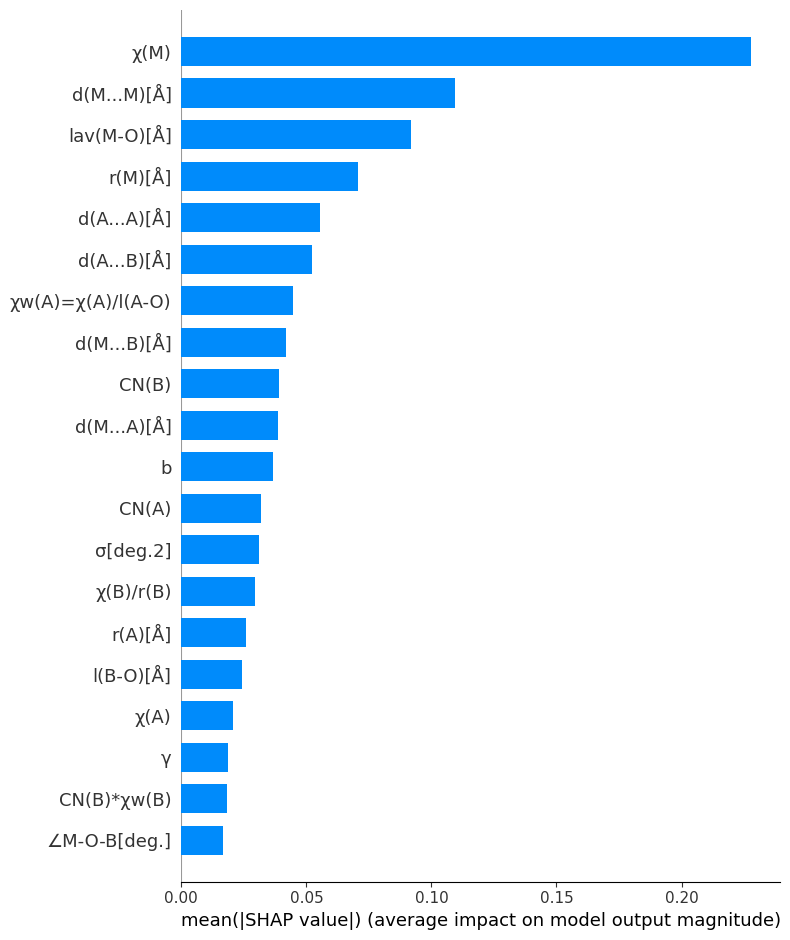

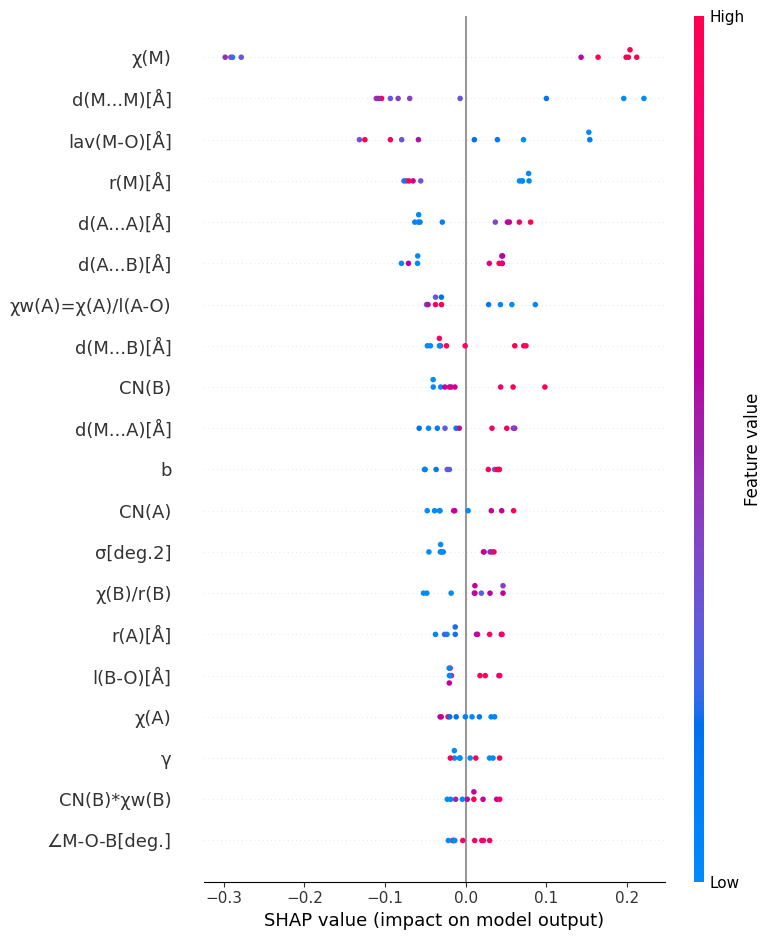

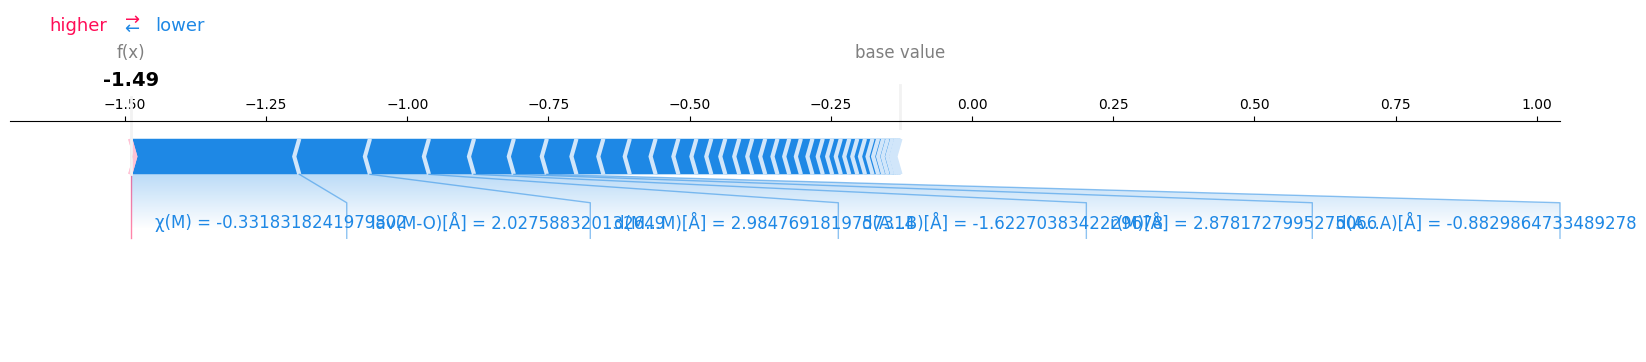

In [42]:
import shap
import catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

# 1. 训练 CatBoost 模型
model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=100)
model.fit(X_train, y_train)

# 2. 计算 SHAP 值
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# 3. 绘制 SHAP 重要性图
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train, plot_type="bar")

# 4. 绘制 SHAP 重要性图（蜂群图）
shap.summary_plot(shap_values, X_train)

# 5. 解释某个样本的 SHAP 贡献
sample_idx = 0  # 选择某个样本
shap.force_plot(explainer.expected_value, shap_values[sample_idx, :], X_train.iloc[sample_idx, :], matplotlib=True)

# # 6. 保存 SHAP 值到 CSV
# shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
# shap_df.to_csv("shap_values.csv", index=False)

# print("SHAP 分析完成，已保存 SHAP 值到 shap_values.csv")


0:	learn: 39.4371924	total: 58.1ms	remaining: 58.1s
100:	learn: 1.8472883	total: 104ms	remaining: 928ms
200:	learn: 0.1468914	total: 152ms	remaining: 605ms
300:	learn: 0.0116804	total: 199ms	remaining: 461ms
400:	learn: 0.0009288	total: 237ms	remaining: 354ms
500:	learn: 0.0000739	total: 280ms	remaining: 279ms
600:	learn: 0.0000059	total: 318ms	remaining: 211ms
700:	learn: 0.0000005	total: 357ms	remaining: 152ms
800:	learn: 0.0000000	total: 401ms	remaining: 99.7ms
900:	learn: 0.0000000	total: 439ms	remaining: 48.2ms
999:	learn: 0.0000000	total: 476ms	remaining: 0us


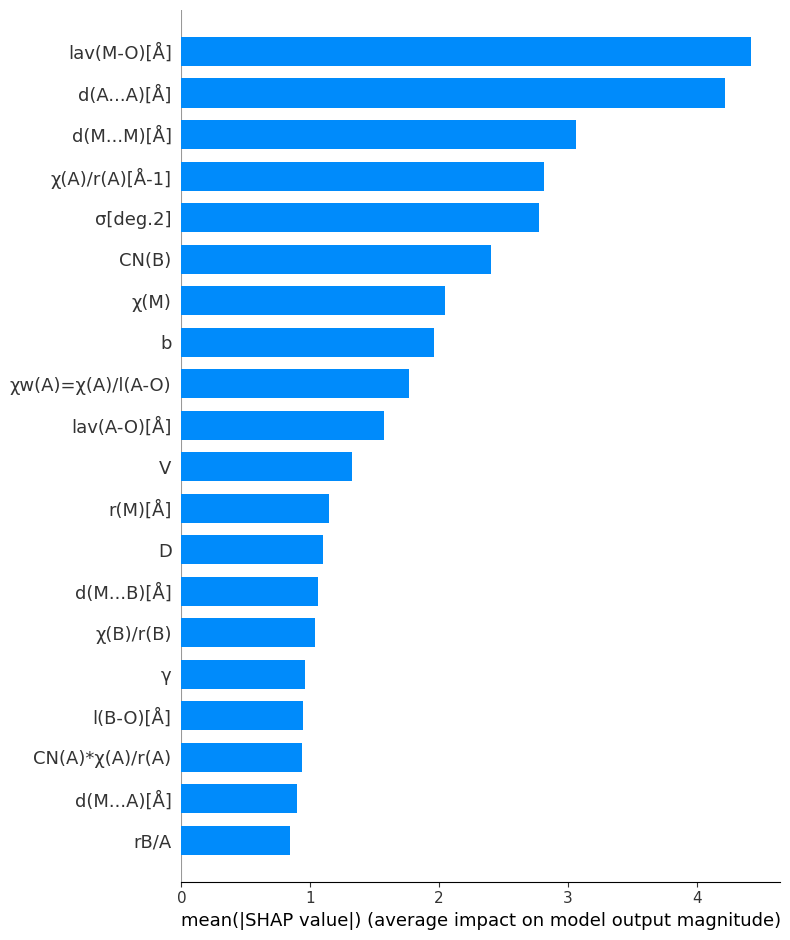

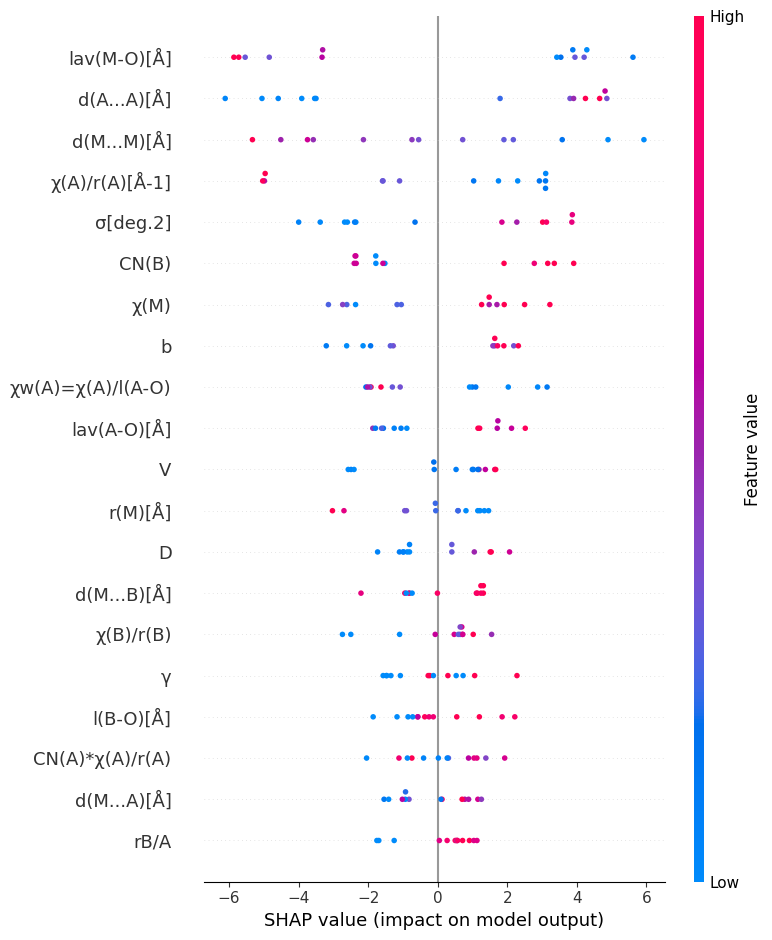

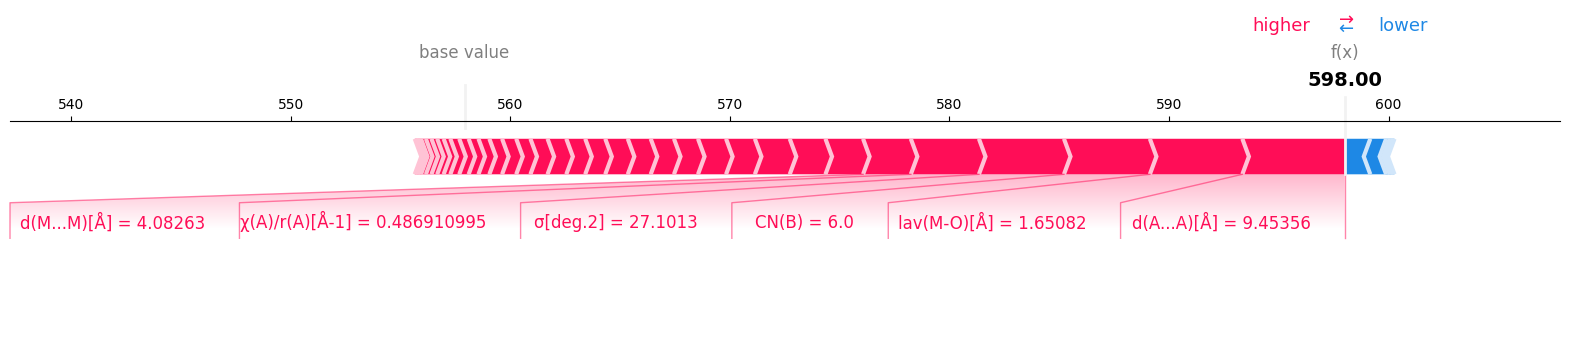

✅ SHAP分析完成，已保存至 'shap_values_Mn.csv'


In [1]:
import shap
import catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

# 1️⃣ 读取数据
file_path = "Mn_prediction.csv"
df = pd.read_csv(file_path)

# 假设最后一列是目标值，其余是特征
X_train = df.iloc[:, :-1]
y_train = df.iloc[:, -1]

# 2️⃣ 训练 CatBoost 模型
model = CatBoostRegressor(
    iterations=1000, 
    depth=6, 
    learning_rate=0.1, 
    loss_function='RMSE', 
    verbose=100
)
model.fit(X_train, y_train)

# 3️⃣ 计算 SHAP 值
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# 4️⃣ 绘制 SHAP 重要性图（条形图）
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train, plot_type="bar")

# 5️⃣ 绘制 SHAP 蜂群图
shap.summary_plot(shap_values, X_train)

# 6️⃣ 解释单个样本的 SHAP 贡献
sample_idx = 0  # 指定样本索引
shap.force_plot(
    explainer.expected_value, 
    shap_values[sample_idx, :], 
    X_train.iloc[sample_idx, :], 
    matplotlib=True
)

# 7️⃣ 保存 SHAP 值到CSV
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_df.to_csv("shap_values_Mn.csv", index=False)

print("✅ SHAP分析完成，已保存至 'shap_values_Mn.csv'")


0:	learn: 39.4371924	total: 1.27ms	remaining: 1.27s
100:	learn: 1.8472883	total: 47.5ms	remaining: 423ms
200:	learn: 0.1468914	total: 99.4ms	remaining: 395ms
300:	learn: 0.0116804	total: 137ms	remaining: 318ms
400:	learn: 0.0009288	total: 174ms	remaining: 259ms
500:	learn: 0.0000739	total: 212ms	remaining: 211ms
600:	learn: 0.0000059	total: 253ms	remaining: 168ms
700:	learn: 0.0000005	total: 293ms	remaining: 125ms
800:	learn: 0.0000000	total: 332ms	remaining: 82.4ms
900:	learn: 0.0000000	total: 369ms	remaining: 40.6ms
999:	learn: 0.0000000	total: 409ms	remaining: 0us


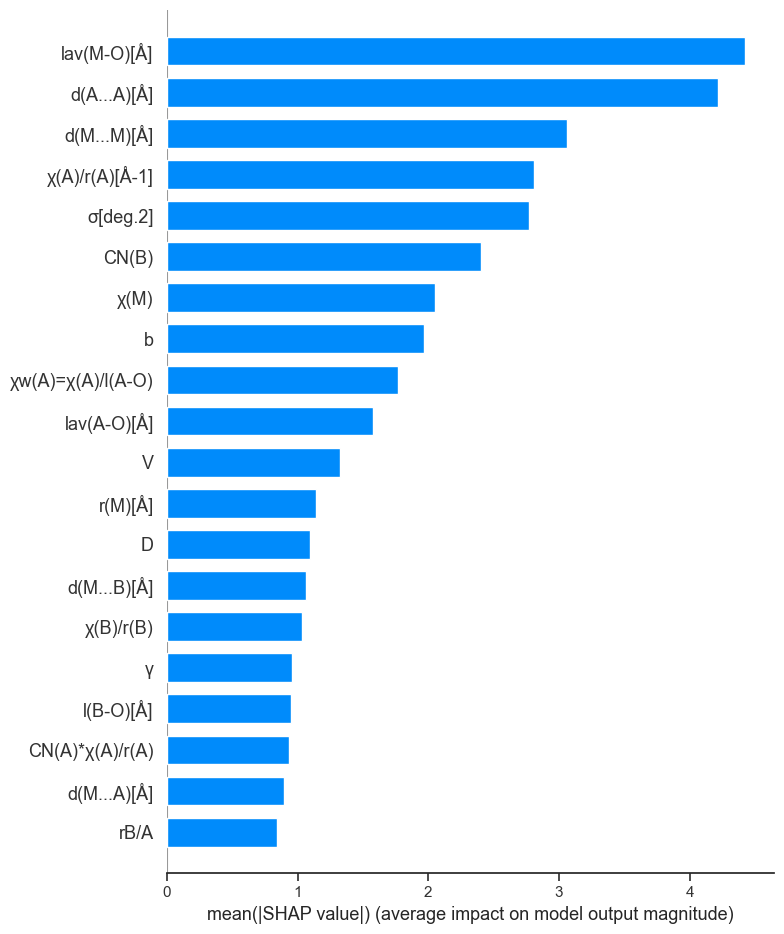

In [21]:
import shap
import catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
import matplotlib.colors as mcolors

# 1️⃣ 读取数据
file_path = "Mn_prediction.csv"
df = pd.read_csv(file_path)

# 假设最后一列是目标值，其余是特征
X_train = df.iloc[:, :-1]
y_train = df.iloc[:, -1]

# 2️⃣ 训练 CatBoost 模型
model = CatBoostRegressor(
    iterations=1000, 
    depth=6, 
    learning_rate=0.1, 
    loss_function='RMSE', 
    verbose=100
)
model.fit(X_train, y_train)

# 3️⃣ 计算 SHAP 值
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# 4️⃣ 绘制 SHAP 重要性图（条形图），使用浅色配色方案
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train, plot_type="bar", cmap="coolwarm")  # 使用 coolwarm 配色（浅色调）

plt.show()


In [44]:
print("SHAP DataFrame Shape:", shap_df.shape)
print("Linkage Matrix Shape:", linked.shape)
print("Feature Names Length:", len(X_train.columns))


SHAP DataFrame Shape: (10, 39)
Linkage Matrix Shape: (9, 4)
Feature Names Length: 39


In [45]:
linked = sch.linkage(shap_df.T, method='ward')  # 这里进行列的聚类，而非行


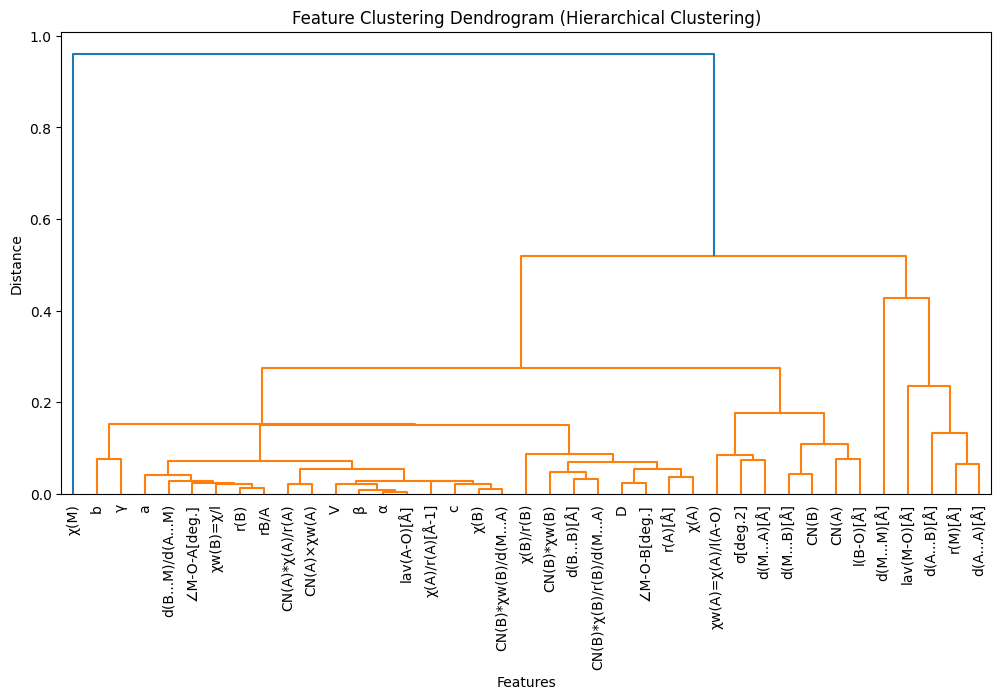

In [46]:
plt.figure(figsize=(12, 6))
sch.dendrogram(linked, labels=shap_df.columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Feature Clustering Dendrogram (Hierarchical Clustering)')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()


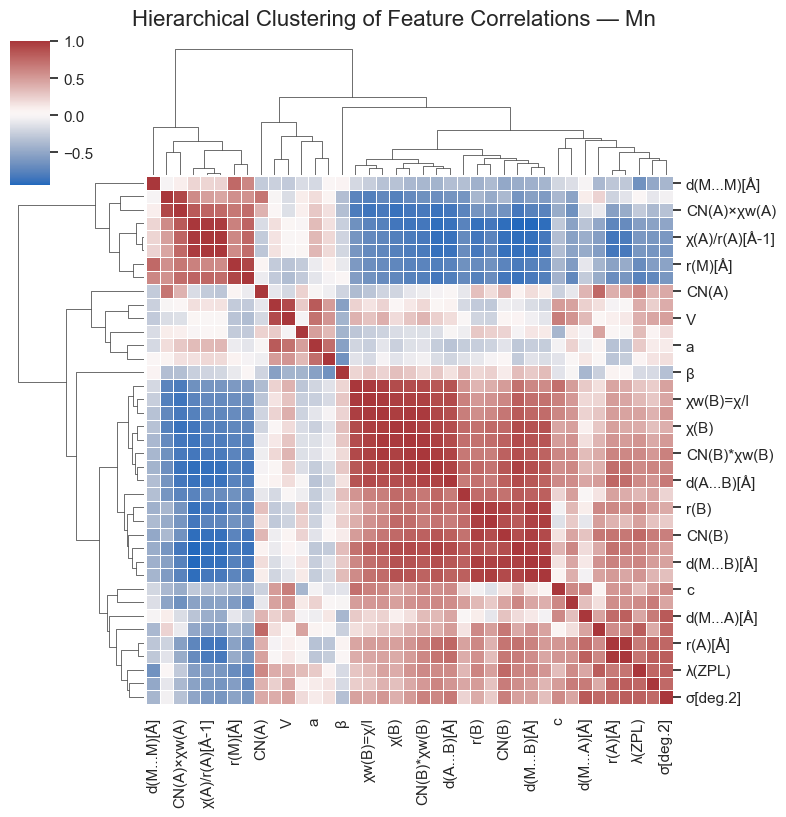

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 读取数据
df_mn = pd.read_csv("Mn_prediction.csv")

# 2️⃣ 删除全为空值的列
df_mn = df_mn.dropna(axis=1, how='all')

# 3️⃣ 删除方差为0的列（全是常数的列，无法计算相关性）
df_mn = df_mn.loc[:, df_mn.std() != 0]

# 4️⃣ 计算相关性矩阵
corr_mn = df_mn.corr()

# 5️⃣ 绘制聚类热力图
sns.set_theme(style="white")
g = sns.clustermap(
    corr_mn,
    cmap='vlag',          # vlag配色：负相关蓝，正相关红，中心0
    linewidths=0.5,
    figsize=(8, 8),
    annot=False           # 在格子上标注相关系
)

# 6️⃣ 添加标题
plt.suptitle("Hierarchical Clustering of Feature Correlations — Mn", fontsize=16, y=1.02)

# 7️⃣ 展示
plt.show()


/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


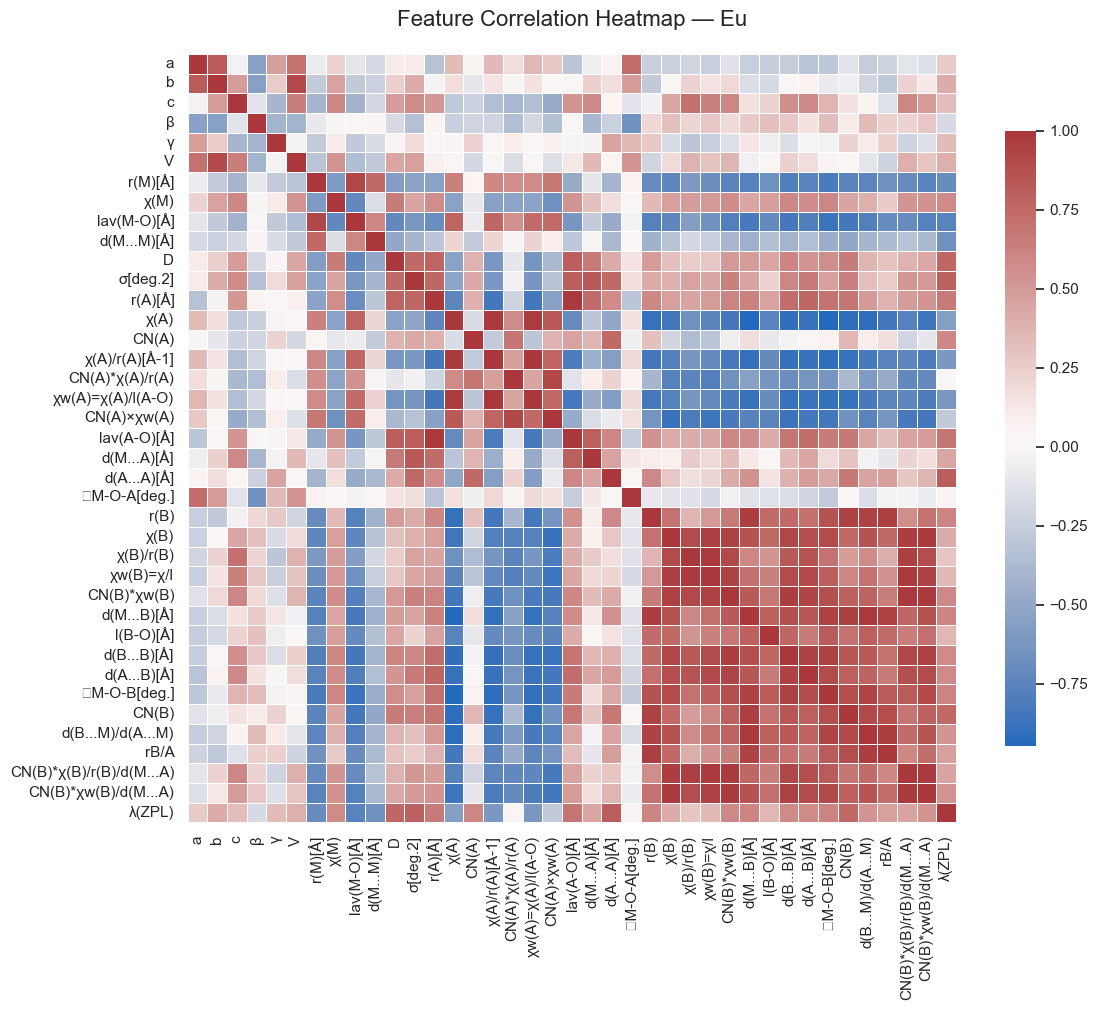

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 读取数据
df_mn = pd.read_csv("Mn_prediction.csv")

# 2️⃣ 删除全为空值的列
df_mn = df_mn.dropna(axis=1, how='all')

# 3️⃣ 删除方差为0的列（全是常数的列，无法计算相关性）
df_mn = df_mn.loc[:, df_mn.std() != 0]

# 4️⃣ 计算相关性矩阵
corr_mn = df_mn.corr()

# 5️⃣ 绘制热力图（非聚类，全部特征完整显示）
plt.figure(figsize=(12, 10))
sns.set_theme(style="white")
sns.heatmap(
    corr_mn, 
    cmap='vlag',
    linewidths=0.5,
    annot=False,           # 在格子上标注相关系数
    fmt=".2f",
    square=True,          # 保持格子正方形
    cbar_kws={"shrink": .8}
)

# 6️⃣ 添加标题
plt.title("Feature Correlation Heatmap — Eu", fontsize=16, pad=20)

# 7️⃣ 展示
plt.tight_layout()
plt.show()


/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


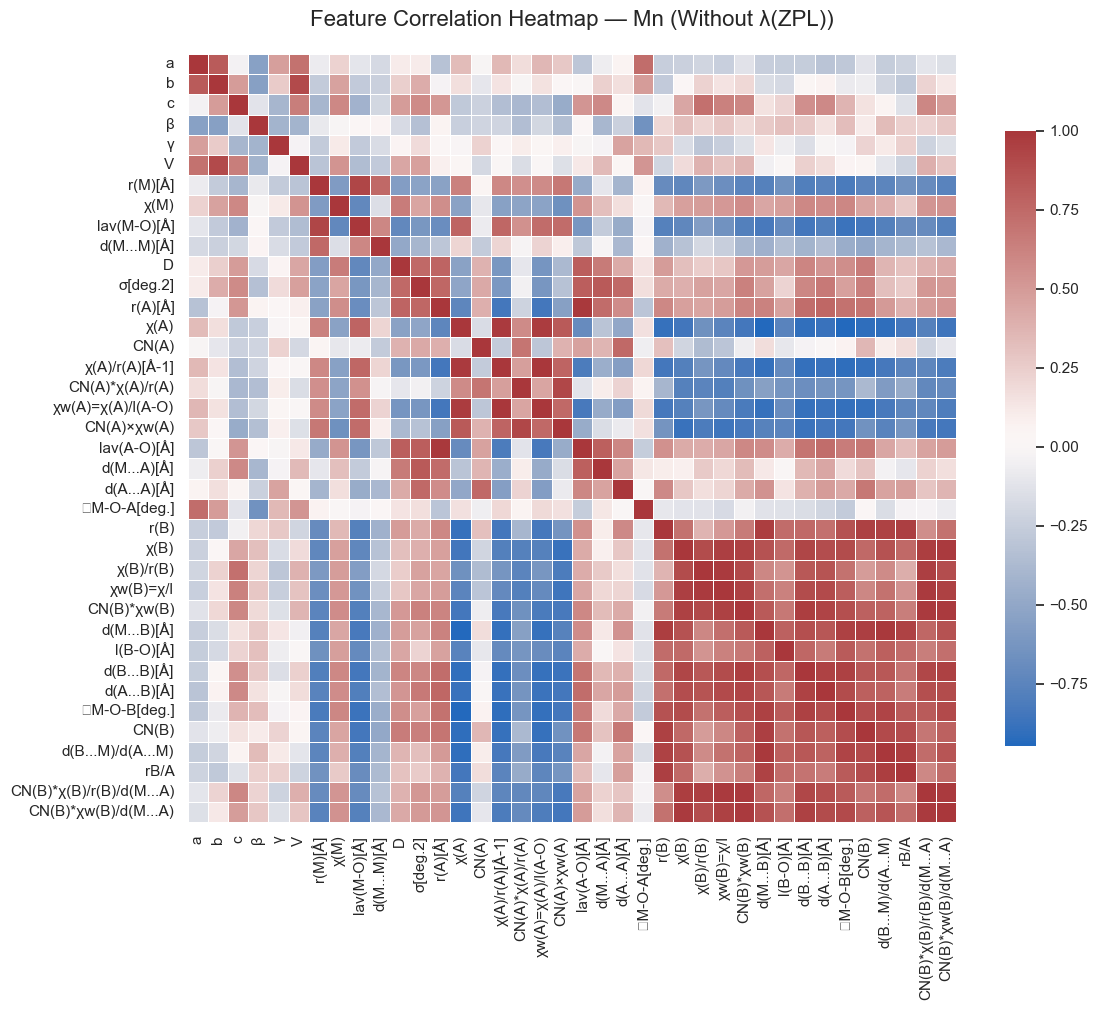

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 读取数据
df_mn = pd.read_csv("Mn_prediction.csv")

# 2️⃣ 删除全为空值的列
df_mn = df_mn.dropna(axis=1, how='all')

# 3️⃣ 删除方差为0的列
df_mn = df_mn.loc[:, df_mn.std() != 0]

# ✅ 4️⃣ 删除 λ(ZPL) 这一列（如果存在）
if "λ(ZPL)" in df_mn.columns:
    df_mn = df_mn.drop(columns=["λ(ZPL)"])

# 5️⃣ 计算相关性矩阵
corr_mn = df_mn.corr()

# 6️⃣ 绘制热力图（非聚类，全部特征完整显示）
plt.figure(figsize=(12, 10))
sns.set_theme(style="white")
sns.heatmap(
    corr_mn, 
    cmap='vlag',
    linewidths=0.5,
    annot=False,           # 不显示数值，如果你需要可以改成 True
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": .8}
)

# 7️⃣ 添加标题
plt.title("Feature Correlation Heatmap — Mn (Without λ(ZPL))", fontsize=16, pad=20)

# 8️⃣ 展示
plt.tight_layout()
plt.show()


/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


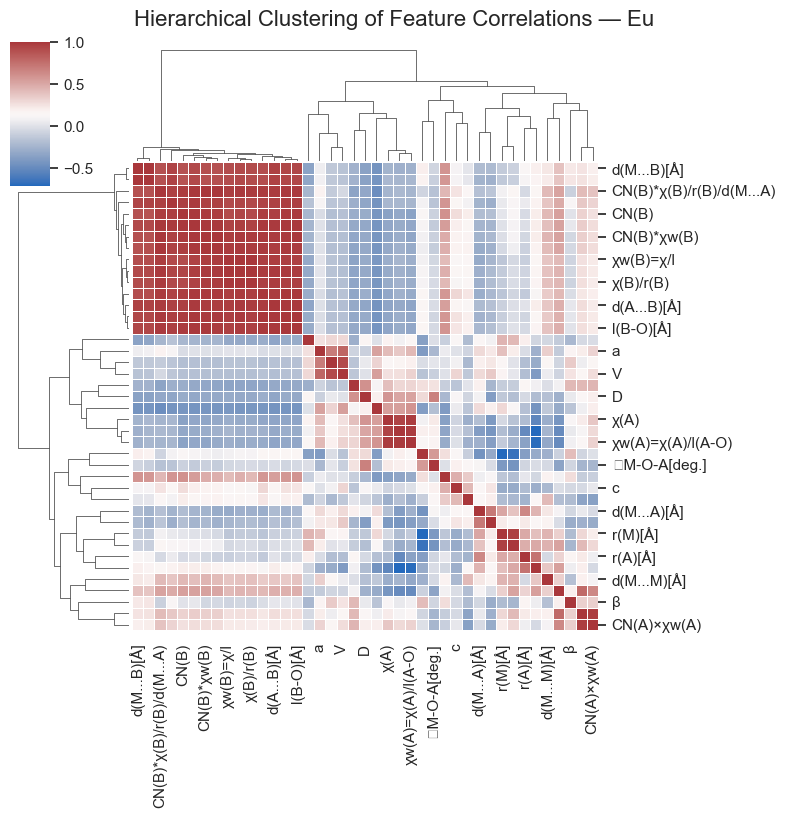

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 读取数据
df_mn = pd.read_csv("Eu_prediction.csv")

# 2️⃣ 删除全为空值的列
df_mn = df_mn.dropna(axis=1, how='all')

# 3️⃣ 删除方差为0的列（全是常数的列，无法计算相关性）
df_mn = df_mn.loc[:, df_mn.std() != 0]

# 4️⃣ 计算相关性矩阵
corr_mn = df_mn.corr()

# 5️⃣ 绘制聚类热力图
sns.set_theme(style="white")
g = sns.clustermap(
    corr_mn,
    cmap='vlag',          # vlag配色：负相关蓝，正相关红，中心0
    linewidths=0.5,
    figsize=(8, 8),
    annot=False           # 在格子上标注相关系
)

# 6️⃣ 添加标题
plt.suptitle("Hierarchical Clustering of Feature Correlations — Eu", fontsize=16, y=1.02)

# 7️⃣ 展示
plt.show()


/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/sunqian/anaconda3/envs/chemistry/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


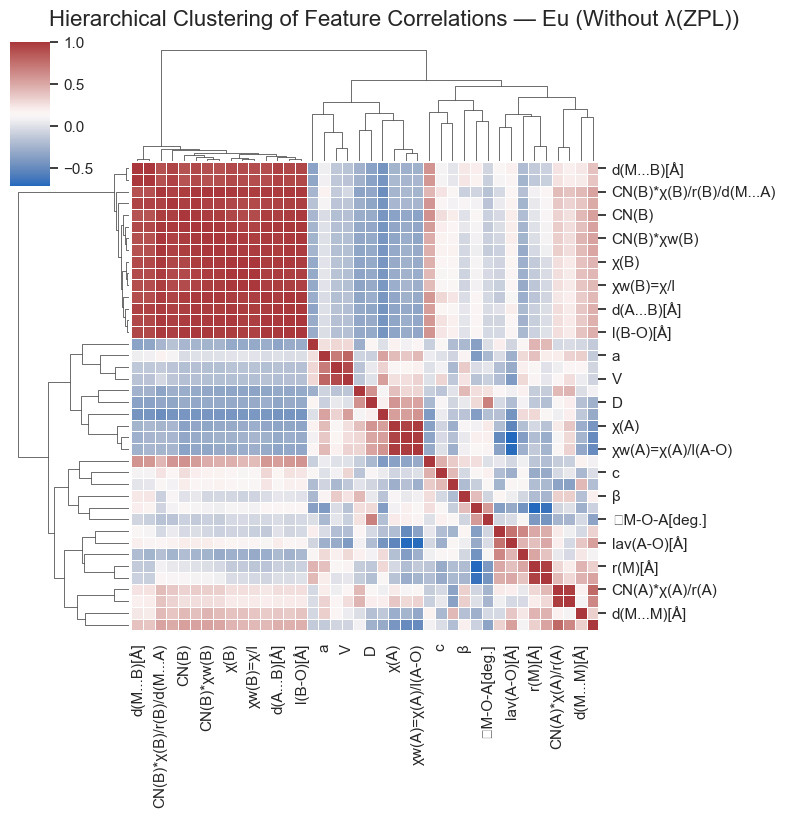

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 读取数据
df_mn = pd.read_csv("Eu_prediction.csv")

# 2️⃣ 删除全为空值的列
df_mn = df_mn.dropna(axis=1, how='all')

# 3️⃣ 删除方差为0的列（全是常数的列）
df_mn = df_mn.loc[:, df_mn.std() != 0]

# ✅ 4️⃣ 删除 λ(ZPL) 这一列（如果存在）
if "λ(ZPL)" in df_mn.columns:
    df_mn = df_mn.drop(columns=["λ(ZPL)"])

# 5️⃣ 计算相关性矩阵
corr_mn = df_mn.corr()

# 6️⃣ 绘制聚类热力图
sns.set_theme(style="white")
g = sns.clustermap(
    corr_mn,
    cmap='vlag',
    linewidths=0.5,
    figsize=(8, 8),
    annot=False
)

# 7️⃣ 添加标题
plt.suptitle("Hierarchical Clustering of Feature Correlations — Eu (Without λ(ZPL))", fontsize=16, y=1.02)

# 8️⃣ 展示
plt.show()
